In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import wilcoxon

sns.set_style("whitegrid")

## Check the plasmid control:
#### purified plasmid was added after locus purification. should have ~uniform methylation

In [216]:
wt_rep3_naked_plasmid = np.loadtxt("controls/wt_mat_Megalodon_repIII_naked_plasmid.txt")
wt_rep2_naked_plasmid = np.loadtxt("controls/naked_plasmid_wt_rep2_1000reads.txt") #1000 reads
#np.random.seed(0)
#wt_rep2_naked_plasmid = subsample(wt_rep2_naked_plasmid, 780)
wt_rep2_naked_plasmid = wt_rep2_naked_plasmid[:780,:]

dies6_rep1_naked = np.loadtxt("controls/DIES6_ALL_REP1_naked_plasmid.txt")
dies6_rep2_naked = np.loadtxt("controls/DIES6_rep2_780READS_naked_plasmid.txt")

disw2_rep1_naked = np.loadtxt("controls/naked_plasmid_disw2_rep1_clean_780READS.csv")
disw2_rep2_naked = np.loadtxt("controls/naked_plasmid_disw2_rep2_clean_780_reads.csv")

#Load methylation data for the reverse strand:

wt_rep3_plasmid_rev = np.loadtxt("controls/plasmid_reverse/mat_Megalodon_repIII_naked_plasmid.txt")
wt_rep2_plasmid_rev = np.loadtxt("controls/plasmid_reverse/mat_Megalodon_repII_naked_plasmid.txt")

dies6_rep1_plasmid_rev = np.loadtxt("controls/plasmid_reverse/mat_Megalodon_20220126_METHYLATION_DIES6_ALL_REP1_naked_plasmid.txt")
dies6_rep2_plasmid_rev = np.loadtxt("controls/plasmid_reverse/mat_Megalodon_20220207_DIES6_ALLstrains_meth_REP2_naked_plasmid.txt")

disw2_rep1_plasmid_rev = np.loadtxt("controls/plasmid_reverse/mat_Megalodon_20211201_all_strains_REP1_disw2_naked_plasmid.txt")
disw2_rep2_plasmid_rev = np.loadtxt("controls/plasmid_reverse/mat_Megalodon_20220221_disw2_all_meth_REP2_naked_plasmid.txt")


In [217]:
def entropy(labels, base=None):
    base = 2 if base is None else base
    _ ,counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()

    return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()

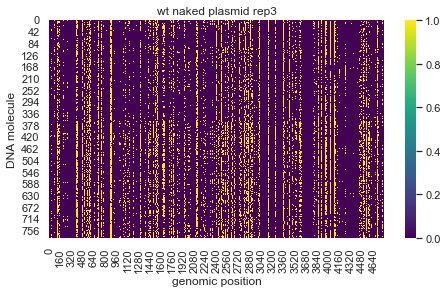

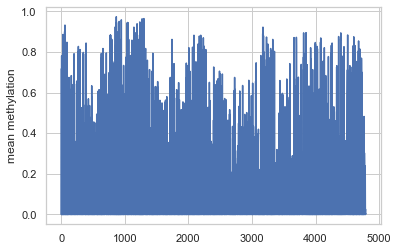

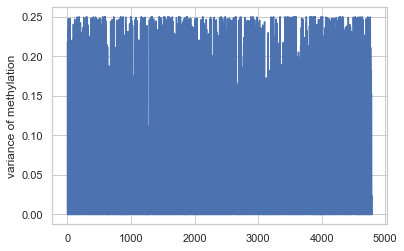

<AxesSubplot:title={'center':'naked plasmid wt rep3, entropy per position'}, ylabel='entropy'>

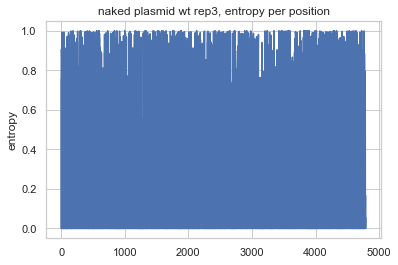

In [218]:
plt.figure(figsize=(7.5,4))
sns.heatmap(wt_rep3_naked_plasmid, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("wt naked plasmid rep3")
plt.show()

sns.lineplot(x = range(wt_rep3_naked_plasmid.shape[1]), 
             y = wt_rep3_naked_plasmid.mean(axis = 0))
plt.ylabel("mean methylation")
plt.show()

sns.lineplot(x = range(wt_rep3_naked_plasmid.shape[1]), 
             y = wt_rep3_naked_plasmid.std(axis = 0)**2)
plt.ylabel("variance of methylation")
plt.show()

g = sns.lineplot(x = range(wt_rep3_naked_plasmid.shape[1]), 
                 y = np.apply_along_axis(entropy, 0, wt_rep3_naked_plasmid))
g.set_ylabel("entropy")
g.set_title("naked plasmid wt rep3, entropy per position")
#g.set_xticks(range(0, ARS305_wt.shape[1], 50))
g

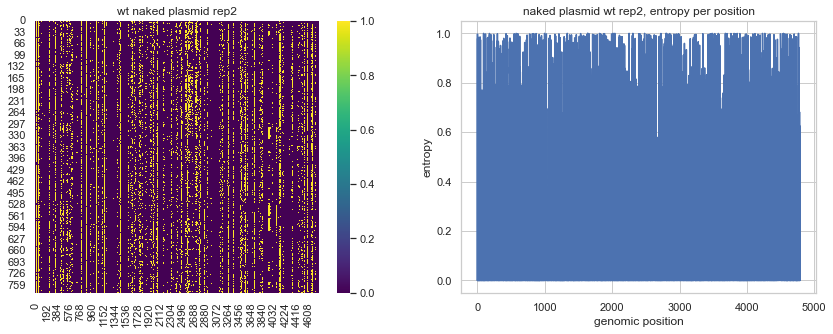

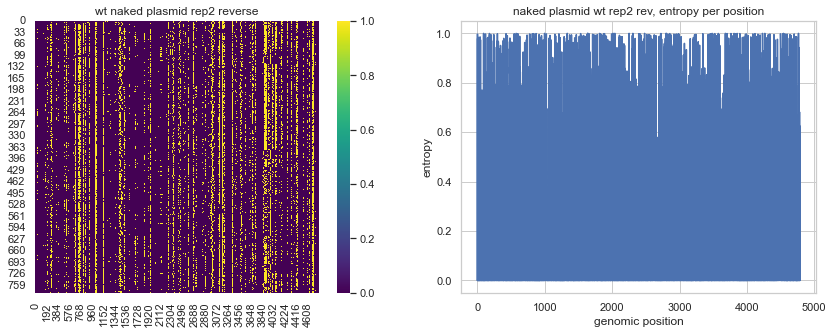

In [219]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))

sns.heatmap(wt_rep2_naked_plasmid, cmap = "viridis", ax =ax1)
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
ax1.set_title("wt naked plasmid rep2")

sns.set_style("whitegrid")
sns.lineplot(x = range(wt_rep2_naked_plasmid.shape[1]), 
                 y = np.apply_along_axis(entropy, 0, wt_rep2_naked_plasmid), ax = ax2)
plt.ylabel("entropy")
ax2.set_title("naked plasmid wt rep2, entropy per position")
plt.show()


fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))

sns.heatmap(wt_rep2_plasmid_rev, cmap = "viridis", ax =ax1)
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
ax1.set_title("wt naked plasmid rep2 reverse")

sns.set_style("whitegrid")
sns.lineplot(x = range(wt_rep2_naked_plasmid.shape[1]), 
                 y = np.apply_along_axis(entropy, 0, wt_rep2_naked_plasmid), ax = ax2)
plt.ylabel("entropy")
ax2.set_title("naked plasmid wt rep2 rev, entropy per position")
plt.show()

In [220]:
wt_rep3_plasmid_join = np.concatenate((wt_rep3_naked_plasmid, wt_rep3_plasmid_rev[:, :-1]), axis = 0)
wt_rep2_plasmid_join = np.concatenate((wt_rep2_naked_plasmid, wt_rep2_plasmid_rev[:, :-1]), axis = 0)

dies6_rep1_plasmid_join = np.concatenate((dies6_rep1_naked, dies6_rep1_plasmid_rev[:, :-1]), axis = 0)
dies6_rep2_plasmid_join = np.concatenate((dies6_rep2_naked, dies6_rep2_plasmid_rev[:, :-1]), axis = 0)

disw2_rep1_plasmid_join = np.concatenate((disw2_rep1_naked, disw2_rep1_plasmid_rev[:, :-1]), axis = 0)
disw2_rep2_plasmid_join = np.concatenate((disw2_rep2_naked, disw2_rep2_plasmid_rev[:, :-1]), axis = 0)

<AxesSubplot:>

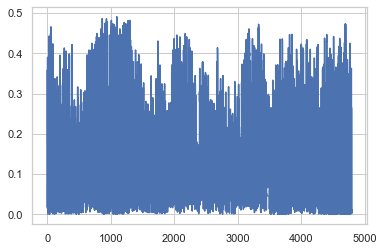

In [221]:
sns.lineplot(x=range(4791), y = wt_rep3_plasmid_join.mean(axis=0))

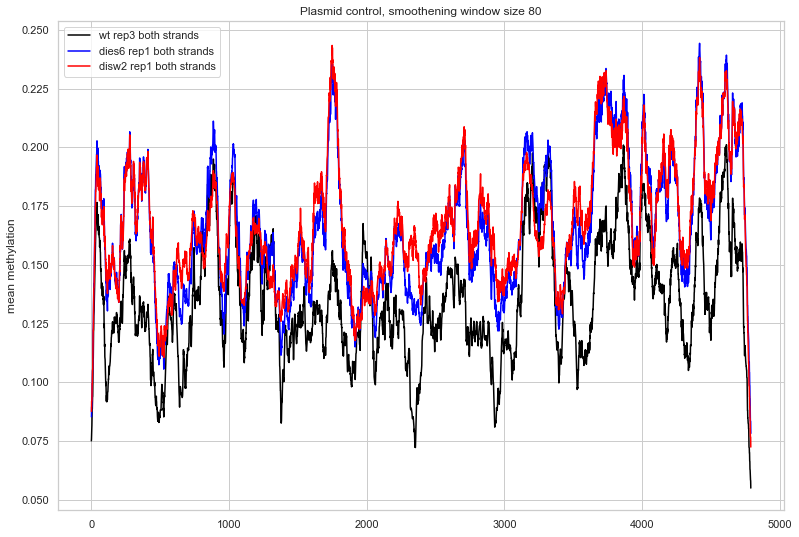

In [222]:
#combine fw and reverse reads and check averaged profile:

N=80
plt.figure(figsize=(13, 9))


sns.lineplot(x = range(4791), y = np.convolve(wt_rep3_plasmid_join.mean(axis=0), np.ones(N)/N, mode="same"),
             color ="black", label="wt rep3 both strands")
sns.lineplot(x = range(4791), y = np.convolve(dies6_rep1_plasmid_join.mean(axis=0), np.ones(N)/N, mode="same"),
             color ="blue", label="dies6 rep1 both strands")
sns.lineplot(x = range(4791), y = np.convolve(disw2_rep1_plasmid_join.mean(axis=0), np.ones(N)/N, mode="same"),
             color ="red", label="disw2 rep1 both strands")
plt.ylabel("mean methylation")
plt.title("Plasmid control, smoothening window size " + str(N))
plt.show()

In [223]:
#overwrite varibale names fro the normlaisation to the plasmid methylation later 
wt_rep3_naked_plasmid = wt_rep3_plasmid_join
wt_rep2_naked_plasmid = wt_rep2_plasmid_join

dies6_rep1_naked = dies6_rep1_plasmid_join
dies6_rep2_naked = dies6_rep2_plasmid_join 

disw2_rep1_naked = disw2_rep1_plasmid_join 
disw2_rep2_naked = disw2_rep2_plasmid_join

## Plot the per base efficiency for the plasmid:

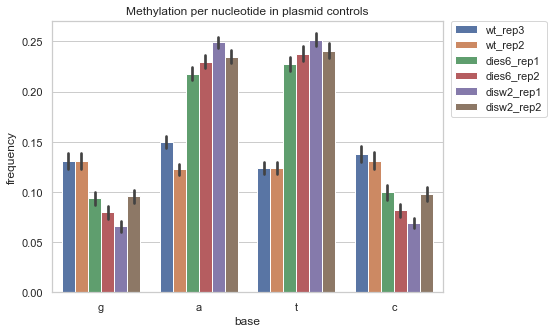

<AxesSubplot:title={'center':'Methylation frequency over samples'}, xlabel='sample', ylabel='normalized frequency of methylation'>

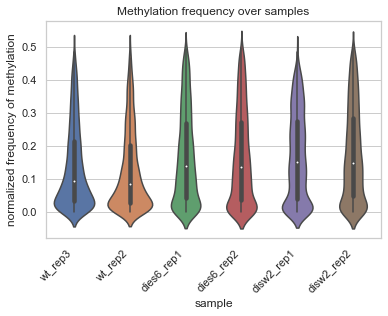

In [224]:
#prepare the data:
seq="ggaagatcctctagagtcgacccgagatcatatcactgtggacgttgatgaaagaatacgttattctttcatcaaatcgtggggctctagggtagttgcgtttctctcattgggacactgaacctcattttccaacattttggtcatgtaagaggcgacaggctcatcgcaggtgggtgcatcaacatggtagtacctggaccaagcgctacattgagtccctcctggataaacaccgctacaatattgtctttggacgtttgcccaaaccatatcttttgaataccaaagctggaccacattgtatggcctaatcattggtgctaccataatactggattgggaaacagtctggttaatttttttcaaccaatttttcttatctagcaatgatttaataaacctgaaatctaaattgtcttcgttagcgtctgtgtcataatctacaattgagtactgtgacgtccaattatatggcaccgagatggggaatctgtccggtgtttcgtcgctgttatccttctcctccctccaaatgaattcctgcagcccgggggatccactagttctagagcggccgccaccgcggtggagctccagcttttgttccctttagtgagggttaatttcgagcttggcgtaatcatggtcatagctgtttcctgtgtgaaattgttatccgctcacaattccacacaacatacgagccggaagcataaagtgtaaagcctggggtgcctaatgagtgagctaactcacattaattgcgttgcgctcactgcccgctttccagtcgggaaacctgtcgtgccagctgcattaatgaatcggccaacgcgcggggagaggcggtttgcgtattgggcgctcttccgcttcctcgctcactgactcgctgcgctcggtcgttcggctgcggcgagcggtatcagctcactcaaaggcggtaatacggttatccacagaatcaggggataacgcaggaaagaacatgtgagcaaaaggccagcaaaaggccaggaaccgtaaaaaggccgcgttgctggcgtttttccataggctccgcccccctgacgagcatcacaaaaatcgacgctcaagtcagaggtggcgaaacccgacaggactataaagataccaggcgtttccccctggaagctccctcgtgcgctctcctgttccgaccctgccgcttaccggatacctgtccgcctttctcccttcgggaagcgtggcgctttctcatagctcacgctgtaggtatctcagttcggtgtaggtcgttcgctccaagctgggctgtgtgcacgaaccccccgttcagcccgaccgctgcgccttatccggtaactatcgtcttgagtccaacccggtaagacacgacttatcgccactggcagcagccactggtaacaggattagcagagcgaggtatgtaggcggtgctacagagttcttgaagtggtggcctaactacggctacactagaaggacagtatttggtatctgcgctctgctgaagccagttaccttcggaaaaagagttggtagctcttgatccggcaaacaaaccaccgctggtagcggtggtttttttgtttgcaagcagcagattacgcgcagaaaaaaaggatctcaagaagatcctttgatcttttctacggggtctgacgctcagtggaacgaaaactcacgttaagggattttggtcatgagattatcaaaaaggatcttcacctagatccttttaaattaaaaatgaagttttaaatcaatctaaagtatatatgagtaaacttggtctgacagttaccaatgcttaatcagtgaggcacctatctcagcgatctgtctatttcgttcatccatagttgcctgactccccgtcgtgtagataactacgatacgggagggcttaccatctggccccagtgctgcaatgataccgcgagacccacgctcaccggctccagatttatcagcaataaaccagccagccggaagggccgagcgcagaagtggtcctgcaactttatccgcctccatccagtctattaattgttgccgggaagctagagtaagtagttcgccagttaatagtttgcgcaacgttgttgccattgctacaggcatcgtggtgtcacgctcgtcgtttggtatggcttcattcagctccggttcccaacgatcaaggcgagttacatgatcccccatgttgtgcaaaaaagcggttagctccttcggtcctccgatcgttgtcagaagtaagttggccgcagtgttatcactcatggttatggcagcactgcataattctcttactgtcatgccatccgtaagatgcttttctgtgactggtgagtactcaaccaagtcattctgagaatagtgtatgcggcgaccgagttgctcttgcccggcgtcaatacgggataataccgcgccacatagcagaactttaaaagtgctcatcattggaaaacgttcttcggggcgaaaactctcaaggatcttaccgctgttgagatccagttcgatgtaacccactcgtgcacccaactgatcttcagcatcttttactttcaccagcgtttctgggtgagcaaaaacaggaaggcaaaatgccgcaaaaaagggaataagggcgacacggaaatgttgaatactcatactcttcctttttcaatattattgaagcatttatcagggttattgtctcatgagcggatacatatttgaatgtatttagaaaaataaacaaataggggttccgcgcacatttccccgaaaagtgccacctaaattgtaagcgttaatattttgttaaaattcgcgttaaatttttgttaaatcagctcattttttaaccaataggccgaaatcggcaaaatcccttataaatcaaaagaatagaccgagatagggttgagtgttgttccagtttggaacaagagtccactattaaagaacgtggactccaacgtcaaagggcgaaaaaccgtctatcagggcgatggcccactacgtgaaccatcaccctaatcaagttttttggggtcgaggtgccgtaaagcactaaatcggaaccctaaagggagcccccgatttagagcttgacggggaaagccggcgaacgtggcgagaaaggaagggaagaaagcgaaaggagcgggcgctagggcgctggcaagtgtagcggtcacgctgcgcgtaaccaccacacccgccgcgcttaatgcgccgctacagggcgcgtcccattcgccattcaggctgcgcaactgttgggaagggcgatcggtgcgggcctcttcgctattacgccagctggcgaaagggggatgtgctgcaaggcgattaagttgggtaacgccagggttttcccagtcacgacgttgtaaaacgacggccagtgaattgtaatacgactcactatagggcgaattgggtaccgggccccccctcgaggtcgacggtatcgataagcttttttgggtcctttgttttcgttgtttcagtctggataaattttaagttaccattatcgaaggcacttttgtacttgtcactaattaaagatgcaatgtcagcggggatactcatttttattttaatttttacttttctgtttgttctaaaatctatctaaactggctttcaagatcaatctattgtcttttaaggtaaactttaaattggaaataatagtaatgttagttccttcattttaaccttgtattgtatttcctttgcgtgatgaaaaaaaaactgaaaaagagaaaaataagaaaatcttctagaacgttccgaaacaggacacttagcacacaaatacagaataggaaagtaaaaggcaatatatgaatgcagtgcttgtaactggtgcttgtatccaagaatagcttcttgctgtaggttatgggaatatcgtgtaagctggggtgacttttgagctattcgcgacgcccgacgccgtaataactactttctcgacccgagatcatatcactgtggacgttgatgaaagaatacgttattctttcatcaaatcgtggtcgaccggcatgcaagctccctcgaggacagaccacttatgacagtatttcaggccgctcttataaaatgacatgttaacaaacagttctgattattcgccttttgacaggacgataatgtaaatagttgtggtagtatcattcaggtatgtaactgtttactttgtatcgcttgaaaaaaataagcatttcagagccttctttggagctcaagtggattgaggccacagcaagaccggccagtttgaatgctcaactcttcaaaagaaattcctcaaatatgtccagtttcatgtactgtccggtgtgatttattattttttatttactttgtagttcttaaagctaagatttttttctttgataaattcttgttttcatatcctaaaattaaagggaaaataaacaatacataacaaaacatataaaaaccaacacaataaaaaaaaggatcaaatactcattaaagtaacttacacgggggctaaaaacggagtttgatgaatattcacaagataaaaatcatatgtatgtttctgatatatcgatatacaatcaaacactttcaagaatttgtttgtagactttttgctagagacctcatcaaagtgctaccaactaagatcaacttatacttcttttagagaaaatttttttcaatgtactccaaagagatttagatcctgtctcttcctcttcctcttcctcgaaagtcaaagaaaaatcagagtctccc"
seq = seq.lower()

eff_df = pd.DataFrame({"wt_rep3": wt_rep3_plasmid_join.mean(axis=0)}, index=range(4791)) 

eff_df["base"] = [letter for letter in seq]

"""
eff_df["wt_rep2"] = wt_rep2_minmax
eff_df["dies6_rep1"] = dies6_rep1_minmax
eff_df["dies6_rep2"] = dies6_rep2_minmax
eff_df["disw2_rep1"] = disw2_rep1_minmax
eff_df["disw2_rep2"] = disw2_rep2_minmax
"""

eff_df["wt_rep2"] = wt_rep2_plasmid_join.mean(axis=0)
eff_df["dies6_rep1"] = dies6_rep1_plasmid_join.mean(axis=0)
eff_df["dies6_rep2"] = dies6_rep2_plasmid_join.mean(axis=0)
eff_df["disw2_rep1"] = disw2_rep1_plasmid_join.mean(axis=0)
eff_df["disw2_rep2"] = disw2_rep2_plasmid_join.mean(axis=0)

eff_df_melt = eff_df.melt(id_vars="base", var_name= "sample", value_name="efficiency")

plt.figure(figsize=(7,5))
sns.barplot(data=eff_df_melt, x = "base", y = "efficiency", hue = "sample")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.title("Methylation per nucleotide in plasmid controls")
plt.ylabel("frequency")
#plt.savefig(load_dir + "/plots/methylation_efficiency_naked_plasmid_per_sample.tif", dpi=300, bbox_inches='tight')
plt.show()

g = sns.violinplot(data = eff_df_melt, x = "sample", y = "efficiency", alpha=0.1)
g.set_ylabel("normalized frequency of methylation")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title("Methylation frequency over samples")

g

## Read in samples for origin ARS305 to set up the annotation of the nucleosome areas

## Wildtype

In [225]:
load_dir =  "ARS305"

In [226]:
ARS305_wt = np.loadtxt("ARS305/wt_mat_Megalodon_repIII_ARS305_end_LexA.txt")
ARS305_wt_rep2 = np.genfromtxt("ARS305/ARS305_wt_REP2_noNA.csv", dtype = int, delimiter = ",") #715 reads

In [227]:
#feature annotation

#ARS305_anno = pd.read_csv("ARS305/Features_from ARS305_end_LexA _(31 .. 1124).txt", sep  = "\t", 
#                          header = None, index_col = 0)
#ARS305_anno.columns = ["position", "length"]

#ARS305_anno = pd.read_csv("ARS305/coordinates_ARS305.txt", sep  = "\t", 
#                          header = None, index_col = 0)

#Version 3 of annotation with nucleosomes and linker
#ARS305_anno = pd.read_csv(load_dir + "/ARS305_80bp.txt", sep  = "\t", 
#                          header = None, index_col = 0)

#Version 4 of annotation
ARS305_anno = pd.read_csv(load_dir + "/coordinates_ARS305_v4.csv", sep  = ",", 
                          header = None, index_col = 0)

ARS305_anno.columns = ["position"]

ARS305_anno.index = ARS305_anno.index.astype("string")
ARS305_anno.index = ARS305_anno.index.str.strip()

ARS305_anno["pos_start"] = ARS305_anno.position.str.split("-").str[0].astype(int) -1
ARS305_anno["pos_stop"] = ARS305_anno.position.str.split("-").str[1].astype(int) -1

ARS305_anno["length"] = ARS305_anno.pos_stop - ARS305_anno.pos_start

In [228]:
#load data for mutants:
ARS305_dies6_rep1 = np.loadtxt("ARS305/DIES6_ALL_REP1_ARS305_end_LexA.txt")
ARS305_dies6_rep2 = np.genfromtxt("ARS305/DIES6_ARS305_REP2_780READS.csv", dtype = int, delimiter = ",")

ARS305_disw2_rep1 = np.genfromtxt("ARS305/ARS305_disw2_rep1_780READS_noNA.csv", dtype = int,
                                 delimiter = ",")
ARS305_disw2_rep2 = np.genfromtxt("ARS305/ARS305_disw2_rep2_780READS_noNA.csv", dtype = int, delimiter = ",")

In [229]:
#load data for reverse strands:

wt_rep3_rev = np.loadtxt( load_dir + "/wt_repIII_ARS305_end_LexA_rev.txt") #780 reads
wt_rep2_rev = np.loadtxt( load_dir + "/wt_repII_ARS305_rev.txt") #780 reads

dies6_rep1_rev = np.loadtxt(load_dir + "/DIES6_ALL_REP1_ARS305_rev.txt") #780 reads
dies6_rep2_rev = np.loadtxt(load_dir + "/DIES6_ALLstrains_meth_REP2_ARS305_rev.txt") #780 reds

disw2_rep1_rev = np.loadtxt(load_dir + "/REP1_disw2_ARS305_rev.txt") 
disw2_rep2_rev = np.loadtxt(load_dir + "/disw2_all_meth_REP2_ARS305_rev.txt") #780 reads

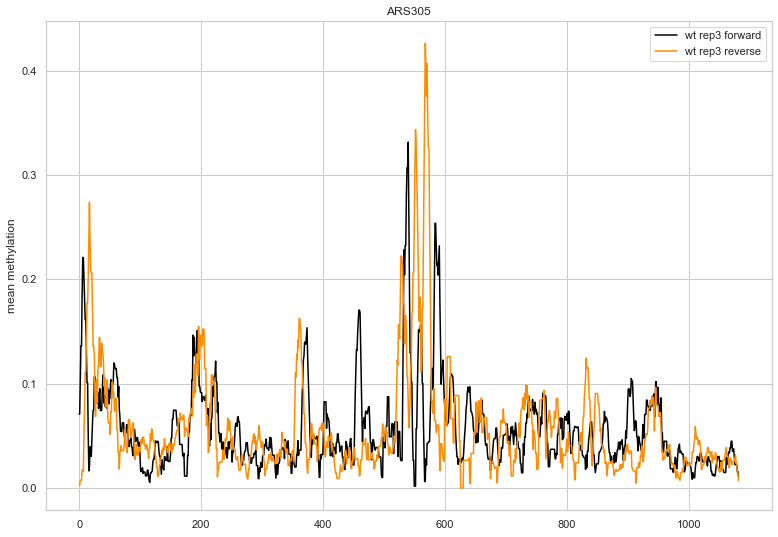

In [230]:
N=10

plt.figure(figsize=(13, 9))
sns.lineplot(x = range(1083), y = np.convolve(ARS305_wt.mean(axis=0)[1:], np.ones(N)/N, mode ="same")
             , color ="black", label="wt rep3 forward")
sns.lineplot(x = range(1083), y = np.convolve(wt_rep3_rev.mean(axis=0), np.ones(N)/N, mode ="same"), 
             color ="darkorange", label="wt rep3 reverse")
plt.ylabel("mean methylation")
plt.title("ARS305")
plt.show()

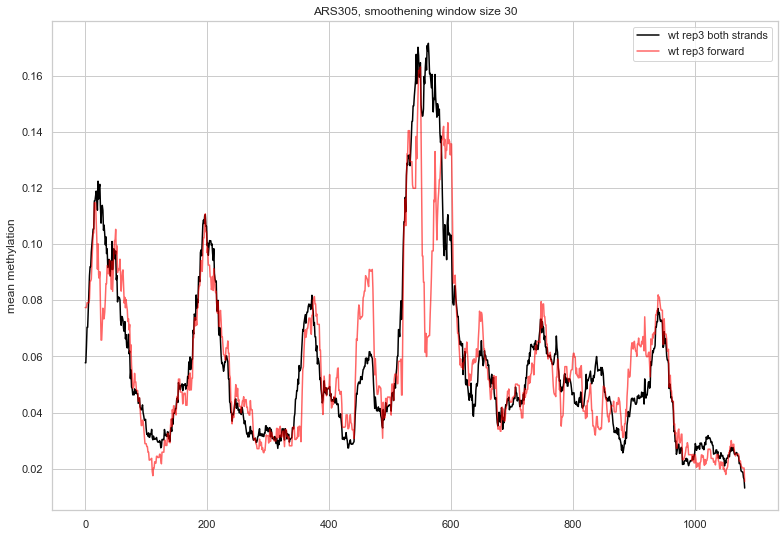

In [231]:
N=30
plt.figure(figsize=(13, 9))
wt_rep3_join = np.concatenate((ARS305_wt[:, 1:], wt_rep3_rev), axis = 0)

sns.lineplot(x = range(1083), y = np.convolve(wt_rep3_join.mean(axis=0), np.ones(N)/N, mode="same"),
             color ="black", label="wt rep3 both strands")
sns.lineplot(x = range(1083), y = np.convolve(ARS305_wt.mean(axis=0)[1:], np.ones(N)/N, mode="same"),
             color ="red", label="wt rep3 forward", alpha =0.6)
plt.ylabel("mean methylation")
plt.title("ARS305, smoothening window size " + str(N))
plt.show()

## Join the matrices for forward and reverse strand

In [232]:
def subsample(array, n):
    np.random.seed(15)
    idx = np.random.randint(len(array), size=n)
    return array[idx,:]

#subsample dies6_rep2_rev to 715 reads
wt_rep2_rev_sub = subsample(wt_rep2_rev, 715)
wt_rep2_join = np.concatenate((ARS305_wt_rep2[:, 1:], wt_rep2_rev_sub), axis = 0)

dies6_rep1_join = np.concatenate((ARS305_dies6_rep1[:, 1:], dies6_rep1_rev), axis = 0)
dies6_rep2_join = np.concatenate((ARS305_dies6_rep2[:, 1:], dies6_rep2_rev), axis = 0)

disw2_rep1_join = np.concatenate((ARS305_disw2_rep1[:, 1:], disw2_rep1_rev), axis = 0)
disw2_rep2_join = np.concatenate((ARS305_disw2_rep2[:, 1:], disw2_rep2_rev), axis = 0)

<AxesSubplot:>

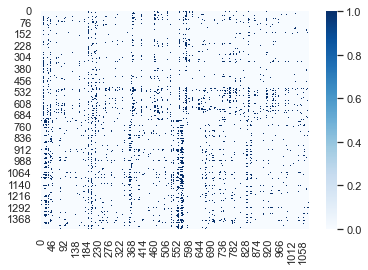

In [233]:
sns.heatmap(wt_rep2_join, cmap="Blues")

In [234]:
#summarise samples
array_dic = {"wt_rep3": wt_rep3_join, 
             "wt_rep2": wt_rep2_join, 
             "dies6_rep1": dies6_rep1_join,
            "dies6_rep2": dies6_rep2_join,
            "disw2_rep1": disw2_rep1_join,
            "disw2_rep2": disw2_rep2_join}

summary=pd.DataFrame()
for element in array_dic.keys():
    summary[element] = pd.DataFrame(array_dic[element].mean(axis=0)).describe()
summary = summary.T
summary["#molecules"] = [array_dic[sample].shape[0] for sample in summary.index]
#summary = summary.T
summary

,count,mean,std,min,25%,50%,75%,max,#molecules
wt_rep3,1083.0,0.057034,0.070619,0.0,0.001923,0.035897,0.080128,0.450000,1560
wt_rep2,1083.0,0.044079,0.056571,0.0,0.000699,0.025874,0.060839,0.369231,1430
dies6_rep1,1083.0,0.073741,0.093714,0.0,0.001282,0.045513,0.107051,0.587821,1560
dies6_rep2,1083.0,0.065112,0.089025,0.0,0.000641,0.037179,0.087821,0.579487,1560
disw2_rep1,1083.0,0.090573,0.111351,0.0,0.000641,0.058974,0.138782,0.687179,1560
disw2_rep2,1083.0,0.090745,0.112197,0.0,0.001923,0.056410,0.135897,0.713462,1560


In [235]:
#assign the old variable names for a quick check for the effects of the reverse strand

ARS305_wt = wt_rep3_join
ARS305_wt_rep2 = wt_rep2_join

ARS305_dies6_rep1 = dies6_rep1_join
ARS305_dies6_rep2 = dies6_rep2_join

ARS305_disw2_rep1 = disw2_rep1_join
ARS305_disw2_rep2 = disw2_rep2_join

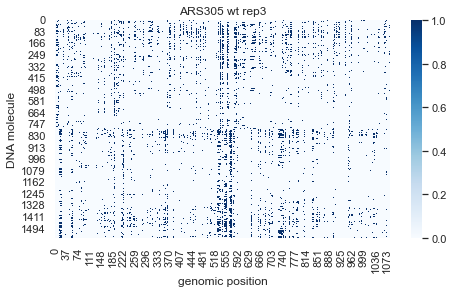

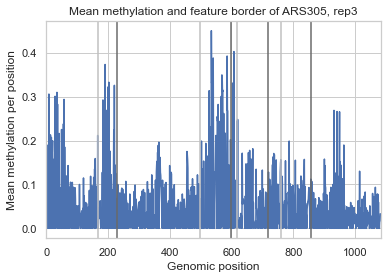

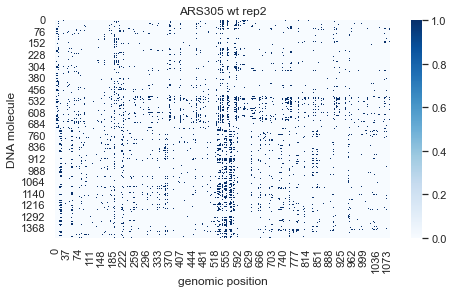

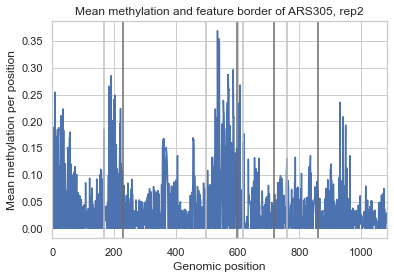

In [236]:
#plot the raw data:
plt.figure(figsize=(7.5,4))
sns.heatmap(ARS305_wt, cmap = "Blues")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, 1084)
plt.title("ARS305 wt rep3")
plt.show()

#and the bulk data:
sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = ARS305_wt.mean(axis = 0)
                )
plt.xlabel("Genomic position")
plt.ylabel("Mean methylation per position")
plt.title("Mean methylation and feature border of ARS305, rep3")
plt.xlim(0, 1084)
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
plt.show()

#wildtype replicate 2:
plt.figure(figsize=(7.5,4))
sns.heatmap(ARS305_wt_rep2, cmap = "Blues")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, 1084)
plt.title("ARS305 wt rep2")
plt.show()

sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = ARS305_wt_rep2.mean(axis = 0)
                )
plt.xlabel("Genomic position")
plt.ylabel("Mean methylation per position")
plt.title("Mean methylation and feature border of ARS305, rep2")
plt.xlim(0, 1084)
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
plt.show()

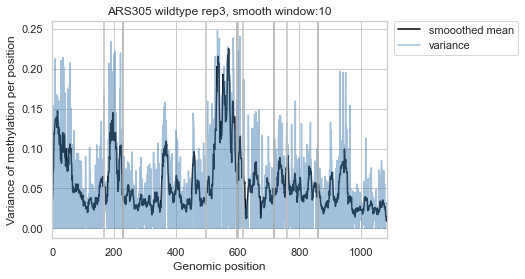

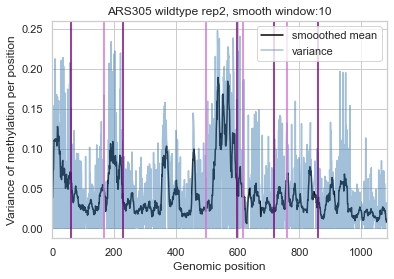

In [237]:
N = 10

sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = np.convolve(ARS305_wt.mean(axis = 0), np.ones(N)/N, mode ="same"),
             color = "black", label = "smooothed mean")
#plt.ylabel("Mean methylation over sample")
plt.xlim(0, ARS305_wt.shape[1])
plt.title("ARS305 wildtype rep3, smooth window:" + str(N))


sns.lineplot(x = range(ARS305_wt.shape[1]), 
            y = ARS305_wt.std(axis = 0)**2, color = "steelblue", alpha = 0.5,
            label = "variance"
            )
plt.ylabel("Variance of methylation per position")
plt.xlabel("Genomic position")
plt.xlim(0, 1084)
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "darkgray")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.show()
    
# Compare that the other replicate
sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = np.convolve(ARS305_wt_rep2.mean(axis = 0), np.ones(N)/N, mode ="same"),
             color = "black", label = "smooothed mean")
#plt.ylabel("Mean methylation over sample")
plt.xlim(0, ARS305_wt.shape[1])
plt.title("ARS305 wildtype rep2, smooth window:" + str(N))
sns.lineplot(x = range(ARS305_wt.shape[1]), 
            y = ARS305_wt.std(axis = 0)**2, color = "steelblue", alpha = 0.5,
            label = "variance"
            )
plt.ylabel("Variance of methylation per position")
plt.xlabel("Genomic position")
plt.axvline(62, color = "purple", label = "border")
plt.xlim(0, 1084)
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "orchid")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "purple")
plt.show()
    

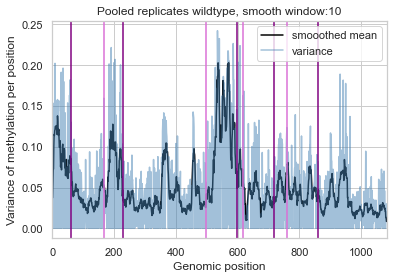

In [238]:
# Concatenate the wildtype replicates and plot the mean and the variance again:

joined_wt = np.concatenate((ARS305_wt, ARS305_wt_rep2), axis = 0)

sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(joined_wt.mean(axis = 0), np.ones(N)/N, mode ="same"),
             color = "black", label = "smooothed mean")
#plt.ylabel("Mean methylation over sample")
plt.xlim(0, joined_wt.shape[1])
plt.title("Pooled replicates wildtype, smooth window:" + str(N))


sns.lineplot(x = range(ARS305_wt.shape[1]), 
            y = joined_wt.std(axis = 0)**2, color = "steelblue", alpha = 0.5,
            label = "variance"
            )
plt.ylabel("Variance of methylation per position")
plt.xlabel("Genomic position")
plt.axvline(62, color = "purple", label = "border")
plt.xlim(0, 1084)
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "orchid")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "purple")
plt.show()

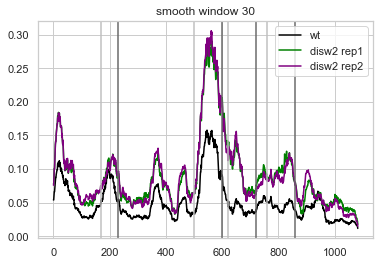

In [239]:
smooth_width = 30

sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(joined_wt.mean(axis = 0), np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(ARS305_disw2_rep1.mean(axis = 0), np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "green", label = "disw2 rep1")
sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(ARS305_disw2_rep2.mean(axis = 0), np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "purple", label = "disw2 rep2")
plt.title("smooth window " + str(smooth_width))

for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
    
plt.show()

## Normalize each experiment to maximum values, and pool replicates

In [240]:
"""wt_rep3_minmax = ARS305_wt.mean(axis = 0)/ARS305_wt.mean(axis = 0).max()
wt_rep2_minmax = ARS305_wt_rep2.mean(axis = 0)/ARS305_wt_rep2.mean(axis = 0).max()

pooled_wt = np.concatenate((wt_rep3_minmax.reshape(1, -1), wt_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)

#dies6
dies6_rep1_minmax = ARS305_dies6_rep1.mean(axis = 0)/ARS305_dies6_rep1.mean(axis = 0).max()
dies6_rep2_minmax = ARS305_dies6_rep2.mean(axis = 0)/ARS305_dies6_rep2.mean(axis = 0).max()

pooled_dies6 = np.concatenate((dies6_rep1_minmax.reshape(1, -1), dies6_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)

#disw2
disw2_rep1_minmax = ARS305_disw2_rep1.mean(axis = 0)/ARS305_disw2_rep1.mean(axis = 0).max()
disw2_rep2_minmax = ARS305_disw2_rep2.mean(axis = 0)/ARS305_disw2_rep2.mean(axis = 0).max()

pooled_disw2 = np.concatenate((disw2_rep1_minmax.reshape(1, -1), disw2_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)"""

'wt_rep3_minmax = ARS305_wt.mean(axis = 0)/ARS305_wt.mean(axis = 0).max()\nwt_rep2_minmax = ARS305_wt_rep2.mean(axis = 0)/ARS305_wt_rep2.mean(axis = 0).max()\n\npooled_wt = np.concatenate((wt_rep3_minmax.reshape(1, -1), wt_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)\n\n#dies6\ndies6_rep1_minmax = ARS305_dies6_rep1.mean(axis = 0)/ARS305_dies6_rep1.mean(axis = 0).max()\ndies6_rep2_minmax = ARS305_dies6_rep2.mean(axis = 0)/ARS305_dies6_rep2.mean(axis = 0).max()\n\npooled_dies6 = np.concatenate((dies6_rep1_minmax.reshape(1, -1), dies6_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)\n\n#disw2\ndisw2_rep1_minmax = ARS305_disw2_rep1.mean(axis = 0)/ARS305_disw2_rep1.mean(axis = 0).max()\ndisw2_rep2_minmax = ARS305_disw2_rep2.mean(axis = 0)/ARS305_disw2_rep2.mean(axis = 0).max()\n\npooled_disw2 = np.concatenate((disw2_rep1_minmax.reshape(1, -1), disw2_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)'

## Normalize each experiment to mean values, and pool replicates

In [241]:
#normalization to the sample mean methylation frequency
"""
wt_rep3_minmax = ARS305_wt.mean(axis = 0)/ARS305_wt.flatten().mean(axis=0)
wt_rep2_minmax = ARS305_wt_rep2.mean(axis = 0)/ARS305_wt_rep2.flatten().mean(axis=0)

pooled_wt = np.concatenate((wt_rep3_minmax.reshape(1, -1), wt_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)

#dies6
dies6_rep1_minmax = ARS305_dies6_rep1.mean(axis = 0)/ARS305_dies6_rep1.flatten().mean(axis=0)
dies6_rep2_minmax = ARS305_dies6_rep2.mean(axis = 0)/ARS305_dies6_rep2.flatten().mean(axis=0)

pooled_dies6 = np.concatenate((dies6_rep1_minmax.reshape(1, -1), dies6_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)

#disw2
disw2_rep1_minmax = ARS305_disw2_rep1.mean(axis = 0)/ARS305_disw2_rep1.flatten().mean(axis=0)
disw2_rep2_minmax = ARS305_disw2_rep2.mean(axis = 0)/ARS305_disw2_rep2.flatten().mean(axis=0)

pooled_disw2 = np.concatenate((disw2_rep1_minmax.reshape(1, -1), disw2_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)"""

#normalisation to the mean methylation freq of the spike in of nucleosomal arrays
mean_array_wt_rep3 = 0.048283
mean_array_wt_rep2 = 0.034160
mean_array_dies6_rep1=0.050732
mean_array_dies6_rep2 = 0.045048
mean_array_disw2_rep1 = 0.061350
mean_array_disw2_rep2 = 0.059359

wt_rep3_minmax = ARS305_wt.mean(axis = 0)/mean_array_wt_rep3
wt_rep2_minmax = ARS305_wt_rep2.mean(axis = 0)/mean_array_wt_rep2

pooled_wt = np.concatenate((wt_rep3_minmax.reshape(1, -1), wt_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)

#dies6
dies6_rep1_minmax = ARS305_dies6_rep1.mean(axis = 0)/mean_array_dies6_rep1
dies6_rep2_minmax = ARS305_dies6_rep2.mean(axis = 0)/mean_array_dies6_rep2

pooled_dies6 = np.concatenate((dies6_rep1_minmax.reshape(1, -1), dies6_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)

#disw2
disw2_rep1_minmax = ARS305_disw2_rep1.mean(axis = 0)/mean_array_disw2_rep1
disw2_rep2_minmax = ARS305_disw2_rep2.mean(axis = 0)/mean_array_disw2_rep2

pooled_disw2 = np.concatenate((disw2_rep1_minmax.reshape(1, -1), disw2_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)



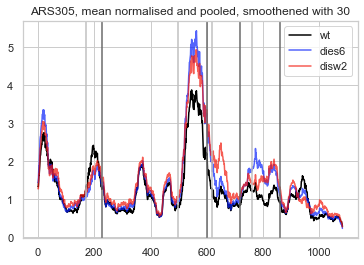

In [242]:
N=30

sns.lineplot(x = range(pooled_wt.shape[0]),
             y = np.convolve(pooled_wt, np.ones(N)/N, mode="same"), #wt_min_max
             color = "black", 
            label = "wt")
sns.lineplot(x = range(pooled_wt.shape[0]),
             y = np.convolve(pooled_dies6, np.ones(N)/N, mode="same"), #dies6_min_max
             color = "#0a22fa", alpha = 0.7,
            label = "dies6")
sns.lineplot(x = range(pooled_wt.shape[0]),
            y = np.convolve(pooled_disw2, np.ones(N)/N, mode = "same"), #disw2_min_max
            color = "#f2180c", alpha = 0.7,
            label = "disw2")
plt.title("ARS305, mean normalised and pooled, smoothened with " + str(N)) #pooled and min-max normalised
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")

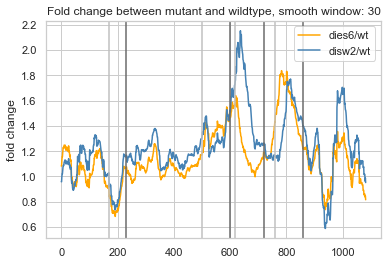

In [243]:
N=30
sns.lineplot(x = range(pooled_wt.shape[0]),
             y = np.convolve(pooled_dies6, np.ones(N)/N, mode="same")/np.convolve(pooled_wt, np.ones(N)/N, mode="same"),
            color = "orange", 
             label = "dies6/wt")
sns.lineplot(x = range(pooled_wt.shape[0]),
             y = np.convolve(pooled_disw2, np.ones(N)/N, mode="same")/np.convolve(pooled_wt, np.ones(N)/N, mode="same"),
            color = "steelblue",
             label = "disw2/wt")
plt.ylabel("fold change")
plt.title("Fold change between mutant and wildtype, smooth window: " + str(N))
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")

### Compare mean distributions between pooled replicates and wildtype with paired wilcoxon test

In [244]:
segments = ARS305_anno.drop(columns = "position")

#list comprehension to catch the pooled methylation values per sample in a cell per column
array_list = [pooled_wt[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]

segments["wt_mean"] = pd.Series(array_list, index = segments.index)

#dies6 mutant 
array_list = [pooled_dies6[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]

segments["dies6_mean"] = pd.Series(array_list, index = segments.index)

#disw2 mutant

array_list = [pooled_disw2[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]

segments["disw2_mean"] = pd.Series(array_list, index = segments.index)

In [245]:
segments["p_value_dies6"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"dies6_mean"],
                                                alternative = "two-sided").pvalue for index in segments.index]

segments["p_value_disw2"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"disw2_mean"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments.drop(segments.columns[3:6], axis =1, inplace = True)

In [246]:
segments
#segments.to_csv(load_dir + "/ARS305_pooled_samples_two-sided-test.csv")

,pos_start,pos_stop,length,p_value_dies6,p_value_disw2
0,,,,,
-2L,169,229,60,5.717737e-02,5.996728e-01
ARS305,499,599,100,1.391228e-11,6.197333e-11
+1ns,619,719,100,5.005809e-07,3.538981e-11
+2ns,759,859,100,1.737854e-11,1.213595e-10


In [247]:
#Regions significant for dies6:
pvalue = 2.5e-2

print("       Which sites have a different mean methylation in the dies6 mutant?")
print("       P-value below: ", pvalue)
segments.loc[(segments["p_value_dies6"] < pvalue)]

       Which sites have a different mean methylation in the dies6 mutant?
       P-value below:  0.025


,pos_start,pos_stop,length,p_value_dies6,p_value_disw2
0,,,,,
ARS305,499,599,100,1.391228e-11,6.197333e-11
+1ns,619,719,100,5.005809e-07,3.538981e-11
+2ns,759,859,100,1.737854e-11,1.213595e-10


In [248]:
#Regions significant for disw2:
print("       Which sites have a different mean methylation in the disw2 mutant?")
print("       P-value below: ", pvalue)
segments.loc[(segments["p_value_disw2"] < pvalue)]

       Which sites have a different mean methylation in the disw2 mutant?
       P-value below:  0.025


,pos_start,pos_stop,length,p_value_dies6,p_value_disw2
0,,,,,
ARS305,499,599,100,1.391228e-11,6.197333e-11
+1ns,619,719,100,5.005809e-07,3.538981e-11
+2ns,759,859,100,1.737854e-11,1.213595e-10


### Compare pooled wildtype to mutant replicates, then filter regions

In [249]:
segments = ARS305_anno.drop(columns = "position")

#list comprehension to catch the pooled methylation values per sample in a cell per column
array_list = [pooled_wt[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]

segments["wt_mean"] = pd.Series(array_list, index = segments.index)

#dies6 mutant 
array_list = [dies6_rep1_minmax[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["dies6_mean_rep1"] = pd.Series(array_list, index = segments.index)

array_list = [dies6_rep2_minmax[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["dies6_mean_rep2"] = pd.Series(array_list, index = segments.index)


#disw2 mutant
array_list = [disw2_rep1_minmax[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["disw2_mean_rep1"] = pd.Series(array_list, index = segments.index)

array_list = [disw2_rep2_minmax[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["disw2_mean_rep2"] = pd.Series(array_list, index = segments.index)

#perform statistical test
segments["p_value_dies6_rep1"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"dies6_mean_rep1"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments["p_value_dies6_rep2"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"dies6_mean_rep2"],
                                                alternative = "two-sided").pvalue for index in segments.index]

segments["p_value_disw2_rep1"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"disw2_mean_rep1"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments["p_value_disw2_rep2"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"disw2_mean_rep2"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments.drop(segments.columns[3:8], axis =1, inplace = True)

In [250]:
segments
#segments.to_csv(load_dir + "/AR305_separate_replicates_two-sided-test.csv")

,pos_start,pos_stop,length,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
0,,,,,,,
-2L,169,229,60,7.003998e-02,3.243639e-02,4.067452e-01,8.082515e-01
ARS305,499,599,100,1.591856e-11,1.646283e-11,2.016971e-09,1.646283e-11
+1ns,619,719,100,1.047113e-08,8.797539e-04,3.653512e-11,1.544555e-10
+2ns,759,859,100,1.232810e-11,2.061465e-11,4.863098e-10,4.195425e-11


In [251]:
#Regions significant for dies6:
pvalue = 5e-2

print("       Which sites have a different mean methylation in the dies6 mutant?")
print("       P-value below: ", pvalue)
segments.loc[(segments["p_value_dies6_rep1"] < pvalue) &
            (segments["p_value_dies6_rep2"] < pvalue)]

       Which sites have a different mean methylation in the dies6 mutant?
       P-value below:  0.05


,pos_start,pos_stop,length,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
0,,,,,,,
ARS305,499,599,100,1.591856e-11,1.646283e-11,2.016971e-09,1.646283e-11
+1ns,619,719,100,1.047113e-08,8.797539e-04,3.653512e-11,1.544555e-10
+2ns,759,859,100,1.232810e-11,2.061465e-11,4.863098e-10,4.195425e-11


In [252]:
#Regions significant for disw2:
pvalue = 5e-2

print("       Which sites have a different mean methylation in the disw2 mutant?")
print("       P-value below: ", pvalue)
segments.loc[(segments["p_value_disw2_rep1"] < pvalue) &
            (segments["p_value_disw2_rep2"] < pvalue)]

       Which sites have a different mean methylation in the disw2 mutant?
       P-value below:  0.05


,pos_start,pos_stop,length,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
0,,,,,,,
ARS305,499,599,100,1.591856e-11,1.646283e-11,2.016971e-09,1.646283e-11
+1ns,619,719,100,1.047113e-08,8.797539e-04,3.653512e-11,1.544555e-10
+2ns,759,859,100,1.232810e-11,2.061465e-11,4.863098e-10,4.195425e-11


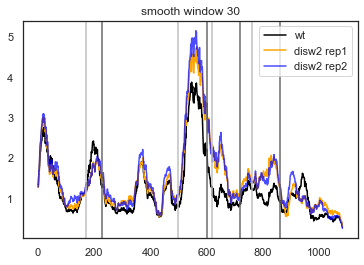

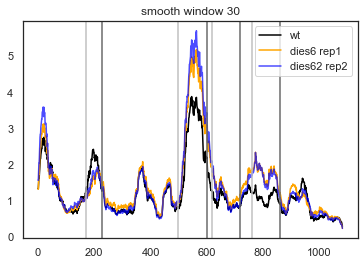

In [253]:
# How does that look over the whole sequence?

sns.set_style("white")
smooth_width = 30

sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(pooled_wt, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(disw2_rep1_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "orange", label = "disw2 rep1")
sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(disw2_rep2_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "blue", alpha = 0.7, label = "disw2 rep2")
plt.title("smooth window " + str(smooth_width))

for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
    
plt.show()

sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(pooled_wt, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(dies6_rep1_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "orange", label = "dies6 rep1")
sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(dies6_rep2_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "blue", alpha = 0.7, label = "dies62 rep2")
plt.title("smooth window " + str(smooth_width))

for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
    
plt.show()

### Normalize part of the ARS305 sequence to part of the naked plasmid 

bases 4082 - 4791 in the naked plasmid correspond to 
223 - 932 in ARS305

they contain: L-1, NS-1, ARS305, NS+1, L+1 and a part of NS+2

In [254]:
#subset the overlap in between the sequences

overlap_plasmid_wt3 = wt_rep3_naked_plasmid[:, 4081:4791]
overlap_plasmid_wt2 = wt_rep2_naked_plasmid[:, 4081:4791]

overlap_plasmid_dies6_1 = dies6_rep1_naked[:, 4081:4791]
overlap_plasmid_dies6_2 = dies6_rep2_naked[:, 4081:4791]

overlap_plasmid_disw2_1 = disw2_rep1_naked[:, 4081:4791]
overlap_plasmid_disw2_2 = disw2_rep2_naked[:, 4081:4791]

overlap_ARS305_wt3 = ARS305_wt[:, 223:933]
overlap_ARS305_wt2 = ARS305_wt_rep2[:, 223:933]

overlap_ARS305_dies6_1 = ARS305_dies6_rep1[:, 223:933]
overlap_ARS305_dies6_2 = ARS305_dies6_rep2[:, 223:933]
overlap_ARS305_disw2_1 = ARS305_disw2_rep1[:, 223:933]
overlap_ARS305_disw2_2 = ARS305_disw2_rep2[:, 223:933]

<AxesSubplot:>

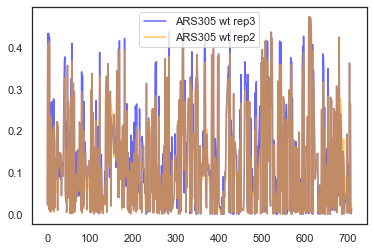

In [255]:
sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), y = overlap_plasmid_wt3.mean(axis = 0), 
             color = "blue", label = "ARS305 wt rep3", alpha = 0.6)
sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), y = overlap_plasmid_wt2.mean(axis = 0), 
             color = "orange", label = "ARS305 wt rep2", alpha = 0.6)

In [256]:
overlap_plasmid_wt_joined = np.concatenate((overlap_plasmid_wt3, overlap_plasmid_wt2), axis = 0).mean(axis=0)

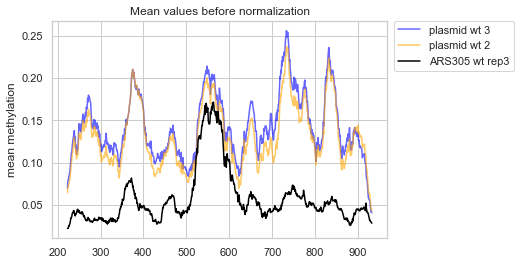

In [257]:
N=30

sns.set_style("whitegrid")
sns.lineplot(x = range(223,933), 
             y = np.convolve(overlap_plasmid_wt3.mean(axis = 0), np.ones(N)/N, mode ="same"), 
             color = "blue", label = "plasmid wt 3", alpha = 0.6)
sns.lineplot(x = range(223,933), 
             y = np.convolve(overlap_plasmid_wt2.mean(axis = 0), np.ones(N)/N, mode ="same"), 
             color = "orange", label = "plasmid wt 2", alpha = 0.6)
#sns.lineplot(x = range(overlap_ARS305.shape[1]), 
#             y = np.convolve(overlap_plasmid_wt_joined, np.ones(N)/N, mode ="same"), 
#             color = "darkgreen", label = "joined plasmids", alpha = 0.6)
sns.lineplot(x = range(223,933), 
             y = np.convolve(overlap_ARS305_wt3.mean(axis = 0), np.ones(N)/N, mode ="same"), 
             color = "black", label = "ARS305 wt rep3")
plt.ylabel("mean methylation")
plt.title("Mean values before normalization")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

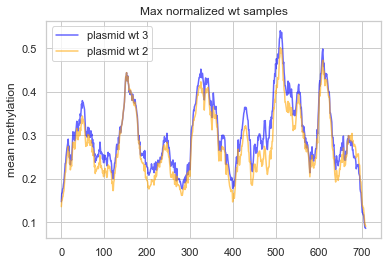

Text(0.5, 1.0, 'Max normalized samples averaged by condition')

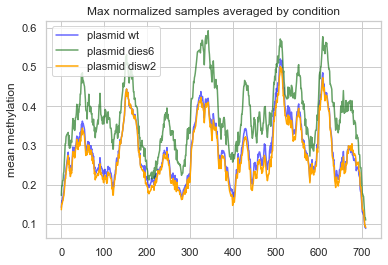

In [258]:
#before normalization, max-scale replicates, pool and average

#plasmid control wt
overlap_wt3_maxnorm = wt_rep3_naked_plasmid[:, 4081:4791].mean(axis=0)/wt_rep3_naked_plasmid[:, 4081:4791].mean(axis=0).max()
overlap_wt2_maxnorm = wt_rep2_naked_plasmid[:, 4081:4791].mean(axis=0)/wt_rep2_naked_plasmid[:, 4081:4791].mean(axis=0).max()

sns.lineplot(x = range(710), 
             y = np.convolve(overlap_wt3_maxnorm, np.ones(N)/N, mode ="same"), 
             color = "blue", label = "plasmid wt 3", alpha = 0.6)
sns.lineplot(x = range(710), 
             y = np.convolve(overlap_wt2_maxnorm, np.ones(N)/N, mode ="same"), 
             color = "orange", label = "plasmid wt 2", alpha = 0.6)
plt.ylabel("mean methylation")
plt.title("Max normalized wt samples")
plt.show()

overlap_wt_maxnorm = np.concatenate((overlap_wt3_maxnorm.reshape(-1, 710),
                                     overlap_wt2_maxnorm.reshape(-1, 710)), axis = 0).mean(axis=0)
#plasmid control for dies6
overlap_dies61_maxnorm = dies6_rep1_naked[:, 4081:4791].mean(axis=0)/dies6_rep1_naked[:, 4081:4791].mean(axis=0).max()
overlap_dies62_maxnorm = dies6_rep2_naked[:, 4081:4791].mean(axis=0)/dies6_rep2_naked[:, 4081:4791].mean(axis=0).max()
overlap_dies6_maxnorm = np.concatenate((overlap_dies61_maxnorm.reshape(-1, 710),
                                     overlap_dies62_maxnorm.reshape(-1, 710)), axis = 0).mean(axis=0)

#plasmid control for disw2
overlap_disw21_maxnorm = disw2_rep1_naked[:, 4081:4791].mean(axis=0)/disw2_rep1_naked[:, 4081:4791].mean(axis=0).max()
overlap_disw22_maxnorm = disw2_rep2_naked[:, 4081:4791].mean(axis=0)/disw2_rep2_naked[:, 4081:4791].mean(axis=0).max()
overlap_disw2_maxnorm = np.concatenate((overlap_disw21_maxnorm.reshape(-1, 710),
                                     overlap_disw22_maxnorm.reshape(-1, 710)), axis = 0).mean(axis=0)

sns.lineplot(x = range(710), 
             y = np.convolve(overlap_wt_maxnorm, np.ones(N)/N, mode ="same"), 
             color = "blue", label = "plasmid wt", alpha = 0.6)
sns.lineplot(x = range(710), 
             y = np.convolve(overlap_dies6_maxnorm, np.ones(N)/N, mode ="same"), 
             color = "darkgreen", label = "plasmid dies6", alpha = 0.6)
sns.lineplot(x = range(710), 
             y = np.convolve(overlap_wt2_maxnorm, np.ones(N)/N, mode ="same"), 
             color = "orange", label = "plasmid disw2")
plt.ylabel("mean methylation")
plt.title("Max normalized samples averaged by condition")

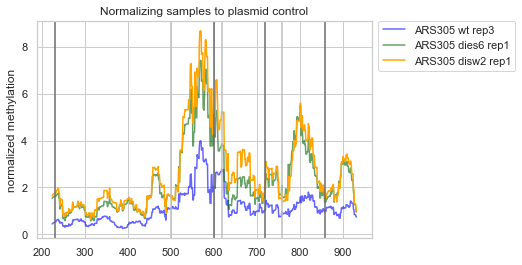

In [259]:
#normalize conditions for ARS305 to the respective plasmid control
# here, normalize each sample from the origin to the pooled control from the respective plasmid sample
norm_overlap_ARS305_wt3 = (overlap_ARS305_wt3.mean(axis=0)+ 0.01)/(overlap_wt_maxnorm+0.01)
norm_overlap_ARS305_dies6_rep1 = (overlap_ARS305_dies6_1.mean(axis=0)+ 0.01)/(overlap_dies6_maxnorm+0.01)
norm_overlap_ARS305_disw2_rep1 = (overlap_ARS305_disw2_1.mean(axis=0)+ 0.01)/(overlap_disw2_maxnorm+0.01)

N=30

sns.lineplot(x = range(223,933), 
             y = np.convolve(norm_overlap_ARS305_wt3, np.ones(N)/N, mode ="same"), 
             color = "blue", label = "ARS305 wt rep3", alpha = 0.6)
sns.lineplot(x = range(223,933), 
             y = np.convolve(norm_overlap_ARS305_dies6_rep1, np.ones(N)/N, mode ="same"), 
             color = "darkgreen", label = "ARS305 dies6 rep1", alpha = 0.6)
sns.lineplot(x = range(223,933), 
             y = np.convolve(norm_overlap_ARS305_disw2_rep1, np.ones(N)/N, mode ="same"), 
             color = "orange", label = "ARS305 disw2 rep1")
plt.ylabel("normalized methylation")
plt.title("Normalizing samples to plasmid control")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

for border in ARS305_anno.loc[:, "pos_start"]:
    if 222 < border < 935:
        plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    if 222 < border < 935:
        plt.axvline(border, color = "dimgray")

Normalize origin ARS305 to part of the plasmid sequence (without scaling)


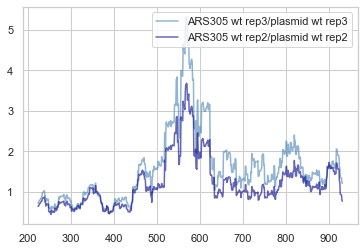

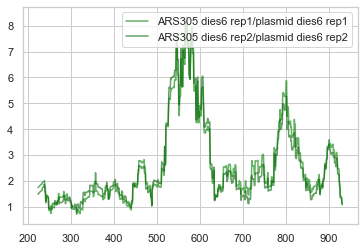

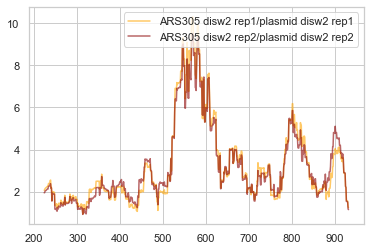

In [260]:
# Different approach: Normalize samples in between experiments - ARS305 wt rep3 to plasmid wt rep3
print("Normalize origin ARS305 to part of the plasmid sequence (without scaling)")
sns.lineplot(x = range(223,933), 
             y = np.convolve((ARS305_wt[:, 223:933].mean(axis = 0)+0.01)/(wt_rep3_naked_plasmid[:, 4081:4791].mean(axis = 0)+0.01), 
                             np.ones(N)/N, mode ="same"), 
             color = "steelblue", label = "ARS305 wt rep3/plasmid wt rep3", alpha = 0.6)
sns.lineplot(x = range(223,933), 
             y = np.convolve((ARS305_wt_rep2[:, 223:933].mean(axis = 0)+0.01)/(wt_rep2_naked_plasmid[:, 4081:4791].mean(axis = 0)+0.01), 
                             np.ones(N)/N, mode ="same"), 
             color = "darkblue", label = "ARS305 wt rep2/plasmid wt rep2", alpha = 0.6)
plt.show()

sns.lineplot(x = range(223,933), 
             y = np.convolve((ARS305_dies6_rep1[:, 223:933].mean(axis = 0)+0.01)/(dies6_rep1_naked[:, 4081:4791].mean(axis = 0)+0.01), 
                             np.ones(N)/N, mode ="same"), 
             color = "green", label = "ARS305 dies6 rep1/plasmid dies6 rep1", alpha = 0.6)
sns.lineplot(x = range(223,933), 
             y = np.convolve((ARS305_dies6_rep2[:, 223:933].mean(axis = 0)+0.01)/(dies6_rep2_naked[:, 4081:4791].mean(axis = 0)+0.01), 
                             np.ones(N)/N, mode ="same"), 
             color = "darkgreen", label = "ARS305 dies6 rep2/plasmid dies6 rep2", alpha = 0.6)
plt.show()


sns.lineplot(x = range(223,933), 
             y = np.convolve((ARS305_disw2_rep1[:, 223:933].mean(axis = 0)+0.01)/(disw2_rep1_naked[:, 4081:4791].mean(axis = 0)+0.01), 
                             np.ones(N)/N, mode ="same"), 
             color = "orange", label = "ARS305 disw2 rep1/plasmid disw2 rep1", alpha = 0.6)
sns.lineplot(x = range(223,933), 
             y = np.convolve((ARS305_disw2_rep2[:, 223:933].mean(axis = 0)+0.01)/(disw2_rep2_naked[:, 4081:4791].mean(axis = 0)+0.01), 
                             np.ones(N)/N, mode ="same"), 
             color = "darkred", label = "ARS305 disw2 rep2/plasmid disw2 rep2", alpha = 0.6)
plt.show()

In [261]:
#Pool replicates per condition and compare the plasmid control
e = 0.05

ARS305_wt3_norm = (ARS305_wt[:, 223:933].mean(axis = 0)+e)/(wt_rep3_naked_plasmid[:, 4081:4791].mean(axis = 0)+e)
ARS305_wt2_norm = (ARS305_wt_rep2[:, 223:933].mean(axis = 0)+e)/(wt_rep2_naked_plasmid[:, 4081:4791].mean(axis = 0)+e)
ARS305_wt_norm_pooled = np.concatenate((ARS305_wt3_norm.reshape(-1, 710), ARS305_wt3_norm.reshape(-1, 710)), axis=0).mean(axis = 0)

ARS305_dies61_norm = (ARS305_dies6_rep1[:, 223:933].mean(axis = 0)+e)/(dies6_rep1_naked[:, 4081:4791].mean(axis = 0)+e)
ARS305_dies62_norm = (ARS305_dies6_rep2[:, 223:933].mean(axis = 0)+e)/(dies6_rep2_naked[:, 4081:4791].mean(axis = 0)+e) 
ARS305_dies6_norm_pooled = np.concatenate((ARS305_dies61_norm.reshape(-1, 710), ARS305_dies62_norm.reshape(-1, 710)), axis=0).mean(axis = 0)

ARS305_disw21_norm = (ARS305_disw2_rep1[:, 223:933].mean(axis = 0)+e)/(disw2_rep1_naked[:, 4081:4791].mean(axis = 0)+e)
ARS305_disw22_norm = (ARS305_disw2_rep2[:, 223:933].mean(axis = 0)+e)/(disw2_rep2_naked[:, 4081:4791].mean(axis = 0)+e)
ARS305_disw2_norm_pooled = np.concatenate((ARS305_disw21_norm.reshape(-1, 710), ARS305_disw22_norm.reshape(-1, 710)), axis=0).mean(axis = 0)

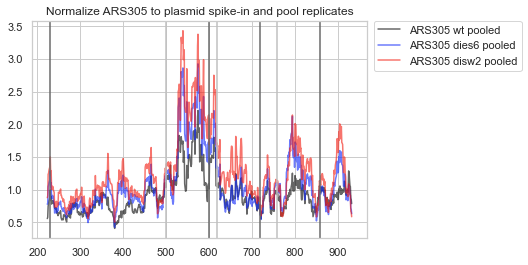

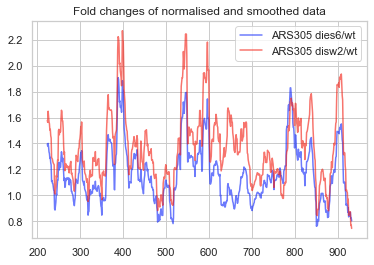

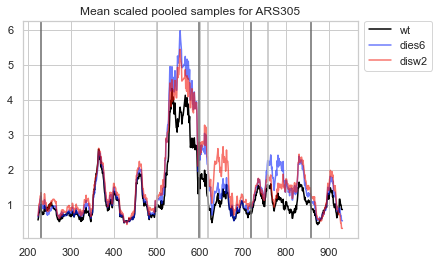

In [262]:
N= 15
sns.set_style("whitegrid")
sns.lineplot(x = range(223,933), 
             y = np.convolve(ARS305_wt_norm_pooled, 
                             np.ones(N)/N, mode ="same"), 
             color = "black", label = "ARS305 wt pooled", alpha = 0.6)
sns.lineplot(x = range(223,933), 
             y = np.convolve(ARS305_dies6_norm_pooled, 
                             np.ones(N)/N, mode ="same"), 
             color = "#0a22fa", label = "ARS305 dies6 pooled", alpha = 0.6)
sns.lineplot(x = range(223,933), 
             y = np.convolve(ARS305_disw2_norm_pooled, 
                             np.ones(N)/N, mode ="same"), 
             color = "#f2180c", label = "ARS305 disw2 pooled", alpha = 0.6)
plt.title("Normalize ARS305 to plasmid spike-in and pool replicates")

for border in ARS305_anno.loc[:, "pos_start"]:
    if 222 < border < 935:
        plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    if 222 < border < 935:
        plt.axvline(border, color = "dimgray")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
#plt.savefig("controls/ARS305_plasmid_norm_pooled_samples.png", dpi=300)
plt.show()

sns.lineplot(x = range(223,933), 
             y = np.convolve(ARS305_dies6_norm_pooled, np.ones(N)/N, mode ="same")/np.convolve(ARS305_wt_norm_pooled, 
                             np.ones(N)/N, mode ="same"), 
             color = "#0a22fa", label = "ARS305 dies6/wt", alpha = 0.6)
sns.lineplot(x = range(223,933), 
             y = np.convolve(ARS305_disw2_norm_pooled, np.ones(N)/N, mode ="same")/np.convolve(ARS305_wt_norm_pooled, 
                             np.ones(N)/N, mode ="same"), 
             color = "#f2180c", label = "ARS305 disw2/wt", alpha = 0.6)
plt.title("Fold changes of normalised and smoothed data")
plt.show()

#compare trend to max scaled dsitributions from pooled data:
sns.lineplot(x = range(223,933),
             y = np.convolve(pooled_wt[223:933], np.ones(N)/N, mode="same"),
             color = "black", 
            label = "wt")
sns.lineplot(x = range(223,933),
             y = np.convolve(pooled_dies6[223:933], np.ones(N)/N, mode="same"),
             color = "#0a22fa", alpha = 0.6,
            label = "dies6")
sns.lineplot(x = range(223,933),
            y = np.convolve(pooled_disw2[223:933], np.ones(N)/N, mode = "same"),
            color = "#f2180c", alpha = 0.6,
            label = "disw2")
plt.title("Mean scaled pooled samples for ARS305")
for border in ARS305_anno.loc[:, "pos_start"]:
    if 222 < border < 935:
        plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    if 222 < border < 935:
        plt.axvline(border, color = "dimgray")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
#plt.savefig("controls/ARS305_max_norm_pooled_samples.png", dpi=300)
plt.show()

## Search for differentially methylated features in data that was normalised to plasmid data

In [264]:
overlap_annotation = ARS305_anno.drop(columns="position")

# for plasmid normalised data, we don't have values for -3ns, -2L, +2ns, +L, +3ns. So, discard these rows

#use for anno v3
#overlap_annotation.drop(overlap_annotation.index[[0,1, 8,9]], axis = 0, inplace=True)
#use for anno v4
overlap_annotation.drop(overlap_annotation.index[[0]], axis = 0, inplace=True)

#move boundaries for annotation to the context of the excised part of the origin
overlap_annotation.pos_start -= 223
overlap_annotation.pos_stop -= 223
segments = overlap_annotation.copy()

In [265]:
segments

,pos_start,pos_stop,length
0,,,
ARS305,276,376,100
+1ns,396,496,100
+2ns,536,636,100


In [266]:
#list comprehension to catch the pooled methylation values per sample in a cell per column
array_list = [ARS305_wt_norm_pooled[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]

segments["wt_norm_plasmid"] = pd.Series(array_list, index = segments.index)

#dies6 mutant 
array_list = [ARS305_dies6_norm_pooled[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["dies6_norm_plasmid"] = pd.Series(array_list, index = segments.index)

#disw2 mutant
array_list = [ARS305_disw2_norm_pooled[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["disw2_norm_plasmid"] = pd.Series(array_list, index = segments.index)
segments

,pos_start,pos_stop,length,wt_norm_plasmid,dies6_norm_plasmid,disw2_norm_plasmid
0,,,,,,
ARS305,276,376,100,"[0.7833333333333333, 1.2448979591836735, 0.826...","[0.9767316017316018, 2.8681318681318677, 0.987...","[0.9767441860465116, 3.226661779081134, 0.9665..."
+1ns,396,496,100,"[0.5611510791366907, 0.6992481203007519, 0.895...","[0.46989657049537287, 0.814622225794293, 0.848...","[0.4486463257412978, 1.0478701913142174, 0.974..."
+2ns,536,636,100,"[3.875, 0.5679012345679012, 0.4427083333333333...","[4.977574621034536, 0.5515893490491042, 0.5070...","[5.836890243902438, 0.6465162468623833, 0.3960..."


In [267]:
#sns.lineplot(x=range(80), y= segments.loc["ARS305","wt_norm_plasmid"], color="black")
#sns.lineplot(x=range(80), y= segments.loc["ARS305","dies6_norm_plasmid"], color= "red")

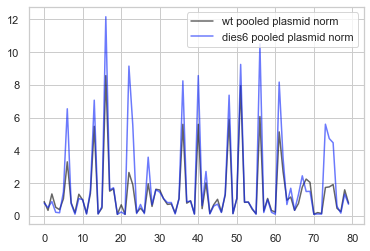

<AxesSubplot:>

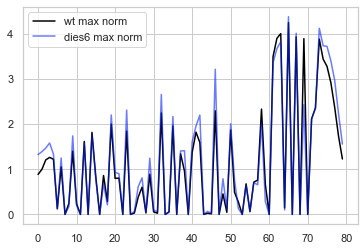

In [268]:
N=1
sns.lineplot(x = range(80), 
             y = np.convolve(ARS305_wt_norm_pooled[296:376], 
                             np.ones(N)/N, mode ="same"), 
             color = "black", label = "wt pooled plasmid norm", alpha = 0.6)
sns.lineplot(x = range(80), 
             y = np.convolve(ARS305_dies6_norm_pooled[296:376], 
                             np.ones(N)/N, mode ="same"), 
             color = "#0a22fa", label = "dies6 pooled plasmid norm", alpha = 0.6)
plt.show()

sns.lineplot(x = range(80),
             y = np.convolve(pooled_wt[296:376], np.ones(N)/N, mode="same"),
             color = "black", 
            label = "wt max norm")
sns.lineplot(x = range(80),
             y = np.convolve(pooled_dies6[296:376], np.ones(N)/N, mode="same"),
             color = "#0a22fa", alpha = 0.6,
            label = "dies6 max norm")

In [269]:
#print(pooled_wt[296:376])
#print(pooled_dies6[296:376])
print(wilcoxon(ARS305_wt_norm_pooled[296:376], ARS305_dies6_norm_pooled[296:376], alternative="two-sided"))
wilcoxon(pooled_wt[296:376], pooled_dies6[296:376], alternative="two-sided")

WilcoxonResult(statistic=1214.0, pvalue=0.051499665375589865)


WilcoxonResult(statistic=510.0, pvalue=0.00039354134553042347)

In [270]:
#perform statistical test
segments["p_value_dies6"] = [wilcoxon(segments.loc[index, "wt_norm_plasmid"], 
                                                segments.loc[index,"dies6_norm_plasmid"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments["p_value_disw2"] = [wilcoxon(segments.loc[index, "wt_norm_plasmid"], 
                                                segments.loc[index,"disw2_norm_plasmid"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments.drop(segments.columns[3:6], axis =1, inplace = True)

segments

,pos_start,pos_stop,length,p_value_dies6,p_value_disw2
0,,,,,
ARS305,276,376,100,0.278776,0.000753
+1ns,396,496,100,0.756980,0.000044
+2ns,536,636,100,0.032187,0.007098


## Calculate statistics for separate replicates

In [271]:
segments = overlap_annotation.copy()

#list comprehension to catch the pooled methylation values per sample in a cell per column
array_list = [ARS305_wt_norm_pooled[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]

segments["wt_norm_plasmid"] = pd.Series(array_list, index = segments.index)

#dies6 mutant 
array_list = [ARS305_dies61_norm[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["dies6_rep1_norm_plasmid"] = pd.Series(array_list, index = segments.index)

array_list = [ARS305_dies62_norm[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["dies6_rep2_norm_plasmid"] = pd.Series(array_list, index = segments.index)


#disw2 mutant
array_list = [ARS305_disw21_norm[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["disw2_rep1_norm_plasmid"] = pd.Series(array_list, index = segments.index)

array_list = [ARS305_disw22_norm[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["disw2_rep2_norm_plasmid"] = pd.Series(array_list, index = segments.index)

In [272]:
#perform statistical test
segments["p_value_dies6_rep1"] = [wilcoxon(segments.loc[index, "wt_norm_plasmid"], 
                                                segments.loc[index,"dies6_rep1_norm_plasmid"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments["p_value_dies6_rep2"] = [wilcoxon(segments.loc[index, "wt_norm_plasmid"], 
                                                segments.loc[index,"dies6_rep2_norm_plasmid"],
                                                alternative = "two-sided").pvalue for index in segments.index]

segments["p_value_disw2_rep1"] = [wilcoxon(segments.loc[index, "wt_norm_plasmid"], 
                                                segments.loc[index,"disw2_rep1_norm_plasmid"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments["p_value_disw2_rep2"] = [wilcoxon(segments.loc[index, "wt_norm_plasmid"], 
                                                segments.loc[index,"disw2_rep2_norm_plasmid"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments.drop(segments.columns[3:8], axis =1, inplace = True)

In [273]:
segments

,pos_start,pos_stop,length,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
0,,,,,,,
ARS305,276,376,100,0.132071,0.478762,0.000175,0.001597
+1ns,396,496,100,0.502556,0.062839,0.000623,0.000008
+2ns,536,636,100,0.001894,0.157489,0.008872,0.012192


In [274]:
#Regions significant for dies6:
pvalue = 5e-2

print("       Which sites have a different mean methylation in the dies6 mutant?")
print("       P-value below: ", pvalue)
segments.loc[(segments["p_value_dies6_rep1"] < pvalue) &
            (segments["p_value_dies6_rep2"] < pvalue)]

       Which sites have a different mean methylation in the dies6 mutant?
       P-value below:  0.05


,pos_start,pos_stop,length,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
0,,,,,,,


In [275]:
#Regions significant for disw2:
pvalue = 5e-2

print("       Which sites have a different mean methylation in the disw2 mutant?")
print("       P-value below: ", pvalue)
segments.loc[(segments["p_value_disw2_rep1"] < pvalue) &
            (segments["p_value_disw2_rep2"] < pvalue)]

       Which sites have a different mean methylation in the disw2 mutant?
       P-value below:  0.05


,pos_start,pos_stop,length,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
0,,,,,,,
ARS305,276,376,100,0.132071,0.478762,0.000175,0.001597
+1ns,396,496,100,0.502556,0.062839,0.000623,0.000008
+2ns,536,636,100,0.001894,0.157489,0.008872,0.012192


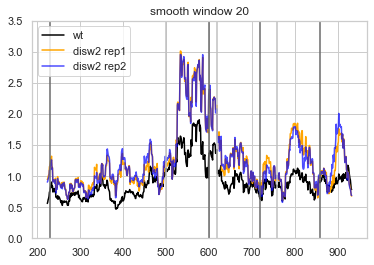

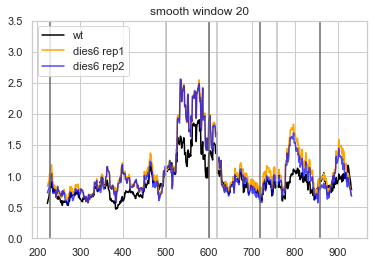

In [276]:
smooth_width = 20

sns.lineplot(x = range(223,933), 
                 y = np.convolve(ARS305_wt_norm_pooled, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(223,933), 
                 y = np.convolve(ARS305_disw21_norm, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "orange", label = "disw2 rep1")
sns.lineplot(x = range(223,933), 
                 y = np.convolve(ARS305_disw22_norm, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "blue", alpha = 0.7, label = "disw2 rep2")
plt.title("smooth window " + str(smooth_width))
#plt.fill_betweenx(y=[0,2], x1=649, x2=729, color="silver")
plt.ylim(0,3.5)

for border in ARS305_anno.loc[:, "pos_start"]:
    if 200 < border < 940:
        plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    if 200 < border < 940:
        plt.axvline(border, color = "dimgray")
    
plt.show()

sns.lineplot(x = range(223,933), 
                 y = np.convolve(ARS305_wt_norm_pooled, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(223,933), 
                 y = np.convolve(ARS305_dies61_norm, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "orange", label = "dies6 rep1")
sns.lineplot(x = range(223,933), 
                 y = np.convolve(ARS305_dies62_norm, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "blue", alpha = 0.7, label = "dies6 rep2")
plt.title("smooth window " + str(smooth_width))
plt.ylim(0,3.5)

for border in ARS305_anno.loc[:, "pos_start"]:
    if 200 < border < 940:
        plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    if 200 < border < 940:
        plt.axvline(border, color = "dimgray")
    
plt.show()

## Compare average methylation per feature

In [277]:
#Display the mean methylation per feature

def condense_features(array, anno):
    output = np.empty(array.shape[0],)
    for index in anno.index:
        feature_array = array[:, anno.loc[index, "pos_start"]: anno.loc[index, "pos_stop"]]
        means_by_feature = np.apply_along_axis(np.mean, 1, feature_array)
        #means_by_feature = np.apply_along_axis(np.std, 1, feature_array)**2 #to calculate variance
        output = np.column_stack((output, means_by_feature))
    return output[:, 1:]

def max_normalise_array(array):
    return array/array.mean(axis=0).max()

In [278]:
"""#normalize the count matrices to the max of averages of the respective sample
wt_rep3_maxnorm = max_normalise_array(wt_rep3)
wt_rep2_maxnorm = max_normalise_array(wt_rep2)

dies6_rep1_maxnorm = max_normalise_array(dies6_rep1)
dies6_rep2_maxnorm = max_normalise_array(dies6_rep2)

disw2_rep1_maxnorm = max_normalise_array(disw2_rep1)
disw2_rep2_maxnorm = max_normalise_array(disw2_rep2)
"""

#normalise the count matrices to the mean methylation frequency of the nucleosomal array spike-in controls
#normalise to the nucleosomal array spike-ins

wt_rep3_maxnorm = ARS305_wt/mean_array_wt_rep3
wt_rep2_maxnorm = ARS305_wt_rep2/mean_array_wt_rep2

dies6_rep1_maxnorm = ARS305_dies6_rep1/mean_array_dies6_rep1
dies6_rep2_maxnorm = ARS305_dies6_rep2/mean_array_dies6_rep2

disw2_rep1_maxnorm = ARS305_disw2_rep1/mean_array_disw2_rep1
disw2_rep2_maxnorm = ARS305_disw2_rep2/mean_array_disw2_rep2

#condense methylation by feature

wt_rep3_feat_me = condense_features(wt_rep3_maxnorm, ARS305_anno)
wt_rep2_feat_me = condense_features(wt_rep2_maxnorm, ARS305_anno)
wt_pool = np.concatenate((wt_rep3_feat_me, wt_rep2_feat_me), axis = 0)

dies6_rep1_feat_me = condense_features(dies6_rep1_maxnorm, ARS305_anno)
dies6_rep2_feat_me = condense_features(dies6_rep2_maxnorm, ARS305_anno)
dies6_pool = np.concatenate((dies6_rep1_feat_me, dies6_rep2_feat_me), axis= 0)

disw2_rep1_feat_me = condense_features(disw2_rep1_maxnorm, ARS305_anno)
disw2_rep2_feat_me = condense_features(disw2_rep2_maxnorm, ARS305_anno)
disw2_pool = np.concatenate((disw2_rep1_feat_me, disw2_rep2_feat_me), axis = 0)

Comparing replicates


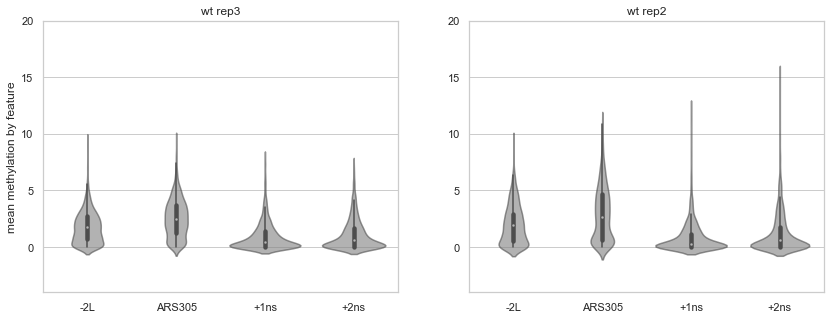

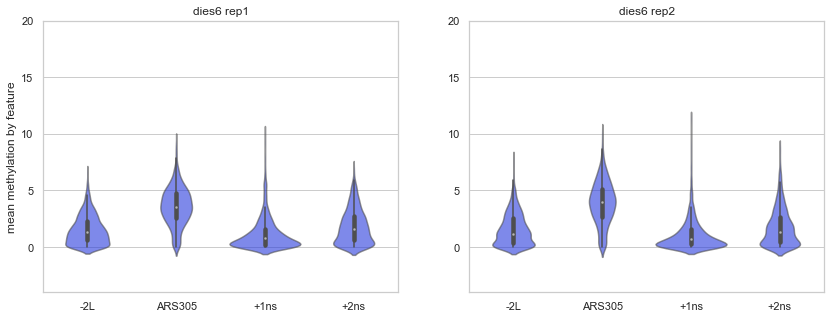

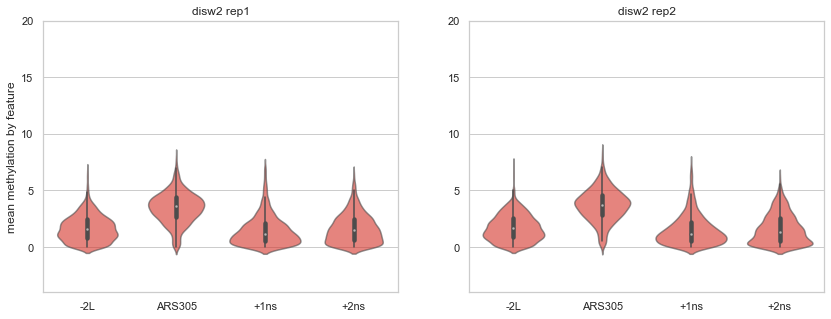

In [299]:
sns.set(font_scale=1)
sns.set_style("whitegrid")

print("Comparing replicates")
#wt
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))

sns.violinplot(data = wt_rep3_feat_me, axis = 1, color = "grey", ax=ax1)
ax1.set_title("wt rep3")
ax1.set_xticklabels(ARS305_anno.index)
ax1.set_ylim(-4, 20)
ax1.set_ylabel("mean methylation by feature")
plt.setp(ax1.collections, alpha = 0.6)

sns.violinplot(data = wt_rep2_feat_me, axis = 1, color = "grey", ax=ax2)
ax2.set_title("wt rep2")
ax2.set_xticklabels(ARS305_anno.index)
ax2.set_ylim(-4, 20)
plt.setp(ax2.collections, alpha = 0.6)
plt.savefig(load_dir + "/plots/ARS305_methylation_by_feature_wt_anno4.tif")
plt.show()

#dies6
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))
sns.violinplot(data = dies6_rep1_feat_me, axis = 1, color = "#0a22fa", ax=ax1)
ax1.set_title("dies6 rep1")
ax1.set_xticklabels(ARS305_anno.index)
ax1.set_ylim(-4, 20)
ax1.set_ylabel("mean methylation by feature")
plt.setp(ax1.collections, alpha = 0.6)

sns.violinplot(data = dies6_rep2_feat_me, axis = 1, color = "#0a22fa", ax=ax2)
ax2.set_title("dies6 rep2")
ax2.set_xticklabels(ARS305_anno.index)
ax2.set_ylim(-4, 20)
plt.setp(ax2.collections, alpha = 0.6)
plt.savefig(load_dir + "/plots/ARS305_methylation_by_feature_dies6_anno4.tif")
plt.show()

#disw2
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))
sns.violinplot(data = disw2_rep1_feat_me, axis = 1, color = "#f2180c", ax=ax1)
ax1.set_title("disw2 rep1")
ax1.set_xticklabels(ARS305_anno.index)
ax1.set_ylim(-4, 20)
plt.setp(ax1.collections, alpha = 0.6)
ax1.set_ylabel("mean methylation by feature")
#plt.setp(ax1.collections, alpha = 0.6)

sns.violinplot(data = disw2_rep2_feat_me, axis = 1, color = "#f2180c", ax=ax2)
ax2.set_title("disw2 rep2")
ax2.set_xticklabels(ARS305_anno.index)
ax2.set_ylim(-4, 20)
plt.setp(ax2.collections, alpha = 0.6)
plt.savefig(load_dir + "/plots/ARS305_methylation_by_feature_disw2_anno4.tif")
plt.show()

In [280]:
#Combine the violinplots into one plot per replicate:
#for each feature, plot wt and mutants next to each other

#transfer array to dataframe, melt that into the long form and assign a catergory "condition"
feat_me_wt_rep3 = pd.DataFrame(wt_rep3_feat_me, columns = ARS305_anno.index)
feat_me_wt_rep3["molecule"] = feat_me_wt_rep3.index
feat_me_wt_rep3_melt = pd.melt(feat_me_wt_rep3, id_vars=("molecule"), var_name = ("feature"))
feat_me_wt_rep3_melt["condition"] = "wt rep3"

feat_me_wt_pool = pd.DataFrame(wt_pool, columns = ARS305_anno.index)
feat_me_wt_pool["molecule"] = feat_me_wt_pool.index
feat_me_wt_melt = pd.melt(feat_me_wt_pool, id_vars=("molecule"), var_name = ("feature"))
feat_me_wt_melt["condition"] = "wt"


#the same for dies6
feat_me_dies6_rep2 = pd.DataFrame(dies6_rep2_feat_me, columns = ARS305_anno.index)
feat_me_dies6_rep2["molecule"] = feat_me_dies6_rep2.index

feat_me_dies6_rep2_melt = pd.melt(feat_me_dies6_rep2, id_vars=("molecule"), var_name = ("feature"))
feat_me_dies6_rep2_melt["condition"] = "dies6"

feat_me_dies6_pool = pd.DataFrame(dies6_pool, columns = ARS305_anno.index)
feat_me_dies6_pool["molecule"] = feat_me_dies6_pool.index
feat_me_dies6_melt = pd.melt(feat_me_dies6_pool, id_vars=("molecule"), var_name = ("feature"))
feat_me_dies6_melt["condition"] = "dies6"

#the same for disw2
feat_me_disw2_rep1 = pd.DataFrame(disw2_rep1_feat_me, columns = ARS305_anno.index)
feat_me_disw2_rep1["molecule"] = feat_me_disw2_rep1.index

feat_me_disw2_rep1_melt = pd.melt(feat_me_disw2_rep1, id_vars=("molecule"), var_name = ("feature"))
feat_me_disw2_rep1_melt["condition"] = "disw2"

feat_me_disw2_pool = pd.DataFrame(disw2_pool, columns = ARS305_anno.index)
feat_me_disw2_pool["molecule"] = feat_me_disw2_pool.index
feat_me_disw2_melt = pd.melt(feat_me_disw2_pool, id_vars=("molecule"), var_name = ("feature"))
feat_me_disw2_melt["condition"] = "disw2"

#merge into one dataframe:
methylation_rep1 = pd.concat([feat_me_wt_melt, feat_me_dies6_melt, feat_me_disw2_melt])
methylation_rep1.rename(columns = {"value" : "norm methylation"}, inplace=True)

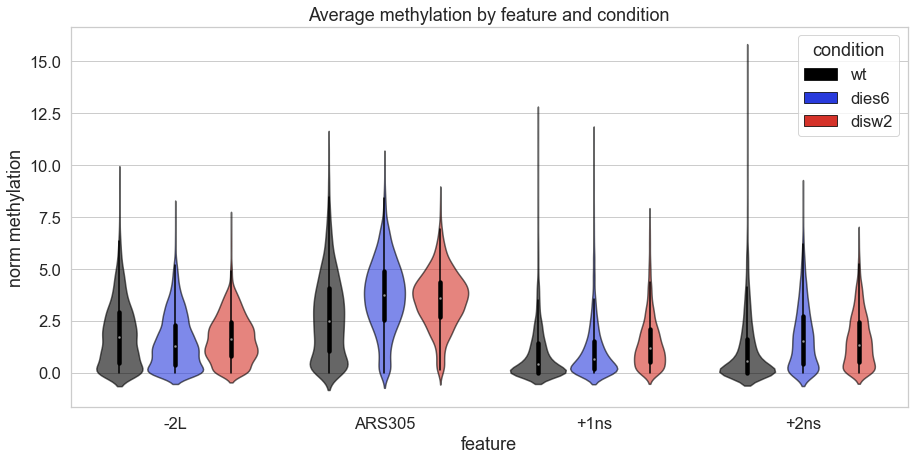

In [281]:
col_Anna = ["black", "#0a22fa", "#f2180c"]

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

plt.figure(figsize = (15,7))
ax = sns.violinplot(data = methylation_rep1, x="feature", y = "norm methylation", hue = "condition", 
                    palette = col_Anna)
plt.setp(ax.collections, alpha = 0.6)
#plt.ylabel("variance")
plt.title("Average methylation by feature and condition")
#plt.ylim(-0.05, 0.3)
#plt.savefig(load_dir + "/plots/ARS305_pooled_av_variation_by_feature_anno3.tif", dpi = 300)
#plt.savefig(load_dir + "/plots/ARS305_pooled_av_norm_methylation_by_feature_anno3.tif", dpi = 300)
plt.show()

In [282]:
#methylation_rep1.to_csv(load_dir + "/ARS305_violinplots_annotation_v3.csv")

In [283]:
from scipy.stats import mannwhitneyu

#Calculate p-values for the distributions in the violins using the mann-whitney U test

feature_pvalues = ARS305_anno.drop(columns = "position")
feature_pvalues["dies6_rep2"] = [mannwhitneyu(feat_me_wt_pool.loc[:, column],
                                        feat_me_dies6_rep2.loc[:, column], 
                                        alternative = "two-sided").pvalue for column in feat_me_wt_rep3.columns if not column == "molecule"]
feature_pvalues["disw2_rep1"] = [mannwhitneyu(feat_me_wt_pool.loc[:, column],
                                        feat_me_disw2_rep1.loc[:, column], 
                                        alternative = "two-sided").pvalue for column in feat_me_wt_rep3.columns if not column == "molecule"]

feature_pvalues

,pos_start,pos_stop,length,dies6_rep2,disw2_rep1
0,,,,,
-2L,169,229,60,1.671323e-05,1.757492e-01
ARS305,499,599,100,1.101933e-85,1.312111e-51
+1ns,619,719,100,2.326172e-11,7.016175e-85
+2ns,759,859,100,7.368335e-56,3.625651e-71


In [284]:
feature_pvalues[feature_pvalues.dies6_rep2 < 2.5e-2]

,pos_start,pos_stop,length,dies6_rep2,disw2_rep1
0,,,,,
-2L,169,229,60,1.671323e-05,1.757492e-01
ARS305,499,599,100,1.101933e-85,1.312111e-51
+1ns,619,719,100,2.326172e-11,7.016175e-85
+2ns,759,859,100,7.368335e-56,3.625651e-71


In [285]:
feature_pvalues[feature_pvalues.disw2_rep1 < 2.5e-2]

,pos_start,pos_stop,length,dies6_rep2,disw2_rep1
0,,,,,
ARS305,499,599,100,1.101933e-85,1.312111e-51
+1ns,619,719,100,2.326172e-11,7.016175e-85
+2ns,759,859,100,7.368335e-56,3.625651e-71


In [286]:
#Calculate p-values for the distributions in the violins using the mann-whitney U test

feature_pvalues = ARS305_anno.drop(columns = "position")
feature_pvalues["dies6_pool"] = [mannwhitneyu(feat_me_wt_pool.loc[:, column],
                                        feat_me_dies6_pool.loc[:, column], 
                                        alternative = "two-sided").pvalue for column in feat_me_wt_rep3.columns if not column == "molecule"]
feature_pvalues["disw2_pool"] = [mannwhitneyu(feat_me_wt_pool.loc[:, column],
                                        feat_me_disw2_pool.loc[:, column], 
                                        alternative = "two-sided").pvalue for column in feat_me_wt_rep3.columns if not column == "molecule"]

feature_pvalues

,pos_start,pos_stop,length,dies6_pool,disw2_pool
0,,,,,
-2L,169,229,60,6.317233e-11,2.964024e-01
ARS305,499,599,100,4.841681e-105,3.645998e-95
+1ns,619,719,100,9.012926e-20,1.069123e-133
+2ns,759,859,100,7.688407e-92,8.676130e-96


In [287]:
feature_pvalues[feature_pvalues.dies6_pool < 2.5e-2]

,pos_start,pos_stop,length,dies6_pool,disw2_pool
0,,,,,
-2L,169,229,60,6.317233e-11,2.964024e-01
ARS305,499,599,100,4.841681e-105,3.645998e-95
+1ns,619,719,100,9.012926e-20,1.069123e-133
+2ns,759,859,100,7.688407e-92,8.676130e-96


In [288]:
feature_pvalues[feature_pvalues.disw2_pool < 2.5e-2]

,pos_start,pos_stop,length,dies6_pool,disw2_pool
0,,,,,
ARS305,499,599,100,4.841681e-105,3.645998e-95
+1ns,619,719,100,9.012926e-20,1.069123e-133
+2ns,759,859,100,7.688407e-92,8.676130e-96


In [289]:
#feature_pvalues.to_csv(load_dir + "/ARS305_p_values_avg_feature_methylation.csv")

## Plot the per base efficiency for the whole ARS305 origin:

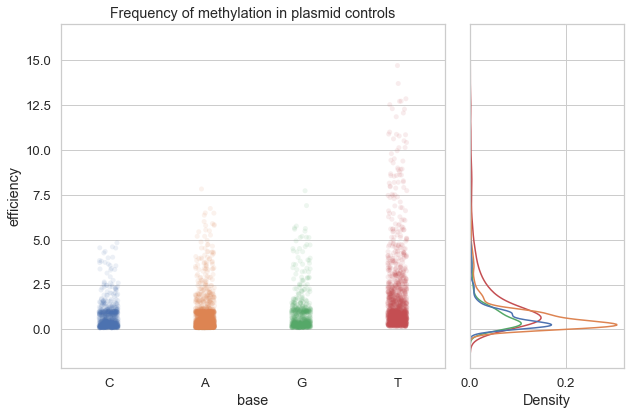

In [290]:
#prepare the data:
seq = "atgaaagaatacgttattctttcatcaaatcgtggtcgaccggcatgcaagctccctcgagAAATACAGAATAGGAAAGTAAAAGGCAATATATGAATGCAGTGCTTGTAACTGGTGCTTGTATCCAAGAATAGCTTCTTGCTGTAGGTTATGGGAATATCGTGTAAGCTGGGGTGACTTTTGAGCTATTCGCGACGCCCGACGCCGTAATAACTACTTTCGACAGACCACTTATGACAGTATTTCAGGCCGCTCTTATAAAATGACATGTTAACAAACAGTTCTGATTATTCGCCTTTTGACAGGACGATAATGTAAATAGTTGTGGTAGTATCATTCAGGTATGTAACTGTTTACTTTGTATCGCTTGAAAAAAATAAGCATTTCAGAGCCTTCTTTGGAGCTCAAGTGGATTGAGGCCACAGCAAGACCGGCCAGTTTGAATGCTCAACTCTTCAAAAGAAATTCCTCAAATATGTCCAGTTTCATGTACTGTCCGGTGTGATTTATTATTTTTTATTTACTTTGTAGTTCTTAAAGCTAAGATTTTTTTCTTTGATAAATTCTTGTTTTCATATCCTAAAATTAAAGGGAAAATAAACAATACATAACAAAACATATAAAAACCAACACAATAAAAAAAAGGATCAAATACTCATTAAAGTAACTTACACGGGGGCTAAAAACGGAGTTTGATGAATATTCACAAGATAAAAATCATATGTATGTTTCTGATATATCGATATACAATCAAACACTTTCAAGAATTTGTTTGTAGACTTTTTGCTAGAGACCTCATCAAAGTGCTACCAACTAAGATCAACTTATACTTCTTTTAGAGAAAATTTTTTTCAATGTACTCCAAAGAGATTTAGATCCTGTCTCTTCCTCTTCCTCTTCCTCGAAAGTCAAAGAAAAATCAGAGTCTCCCTGCTTATTCAGGCGGAGAGGCTCTAGGGTAGTTGCGTTTCTCTCATTGGGACACTGAACCTCATTTTCCAACATTTTGGTCATGTAAGAGGCGACAGGCTCATCGCAGGTGGGTGCATCAACATGGTAGTACCTGGACCAAGCGCTACATTG"
#sequence of overlap of origin and plasmid:
seq= seq[223:933]

#eff_df = pd.DataFrame({"wt_rep3": wt_rep3_minmax}, index=range(1083)) #wt_rep3_minmax #ARS305_wt.mean(axis=0)
eff_df = pd.DataFrame({"wt_rep3": ARS305_wt3_norm}, index=range(710)) 

eff_df["base"] = [letter for letter in seq]

"""
eff_df["wt_rep2"] = ARS305_wt_rep2.mean(axis=0)
eff_df["dies6_rep1"] = ARS305_dies6_rep1.mean(axis=0)
eff_df["dies6_rep2"] = ARS305_dies6_rep2.mean(axis=0)
eff_df["disw2_rep1"] = ARS305_disw2_rep1.mean(axis=0)
eff_df["disw2_rep2"] = ARS305_disw2_rep2.mean(axis=0)

""" """
eff_df["wt_rep2"] = wt_rep2_minmax
eff_df["dies6_rep1"] = dies6_rep1_minmax
eff_df["dies6_rep2"] = dies6_rep2_minmax
eff_df["disw2_rep1"] = disw2_rep1_minmax
eff_df["disw2_rep2"] = disw2_rep2_minmax
"""

eff_df["wt_rep2"] = ARS305_wt2_norm
eff_df["dies6_rep1"] = ARS305_dies61_norm
eff_df["dies6_rep2"] = ARS305_dies62_norm
eff_df["disw2_rep1"] = ARS305_disw21_norm
eff_df["disw2_rep2"] = ARS305_disw22_norm

eff_df_melt = eff_df.melt(id_vars="base", var_name= "sample", value_name="efficiency")

# specify plot layouts with different width using subplots()
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

f, axs = plt.subplots(1,2,
                      figsize=(9,6),
                      sharey=True,
                     gridspec_kw=dict(width_ratios=[2.5,1]))
# make scatterplot with legends
sns.stripplot(data = eff_df_melt, x = "base", y = "efficiency", alpha=0.1, ax= axs[0])
axs[0].set_title("Frequency of methylation in plasmid controls")
axs
# make densityplot with kdeplot without legends
sns.kdeplot(data= eff_df_melt,
                y="efficiency",
                hue="base",
                ax=axs[1],
                legend=False, warn_singular=False)
f.tight_layout()
#plt.savefig(load_dir + "/plots/methylation_efficiency_naked_plasmid.tif", dpi=300)

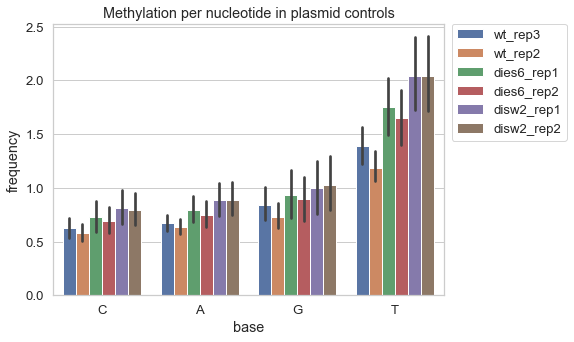

In [291]:
plt.figure(figsize=(7,5))
sns.barplot(data=eff_df_melt, x = "base", y = "efficiency", hue = "sample")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.title("Methylation per nucleotide in plasmid controls")
plt.ylabel("frequency")
#plt.savefig(load_dir + "/plots/methylation_efficiency_naked_plasmid_per_sample.tif", dpi=300, bbox_inches='tight')
plt.show()

<AxesSubplot:title={'center':'Normalized methylation over samples'}, xlabel='sample', ylabel='normalized frequency of methylation'>

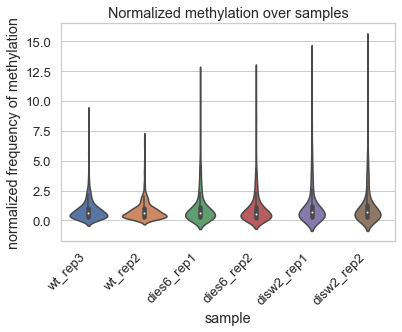

In [292]:
g = sns.violinplot(data = eff_df_melt, x = "sample", y = "efficiency", alpha=0.1)
g.set_ylabel("normalized frequency of methylation")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title("Normalized methylation over samples")

g

In [293]:
#Exporting aggregated data for Anna to plot for the manuscript 
#31th May 2022

smooth = {"wt_pooled": np.convolve(pooled_wt, np.ones(smooth_width)/smooth_width, mode ="same"),
          "wt_rep3": np.convolve(wt_rep3_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
          "wt_rep2": np.convolve(wt_rep2_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
         "dies6_rep1": np.convolve(dies6_rep1_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
         "dies6_rep2": np.convolve(dies6_rep2_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
         "dies6_pooled": np.convolve(pooled_dies6, np.ones(smooth_width)/smooth_width, mode="same"),
         "disw2_rep1": np.convolve(disw2_rep1_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
         "disw2_rep2": np.convolve(disw2_rep2_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
         "disw2_pooled": np.convolve(pooled_disw2, np.ones(smooth_width)/smooth_width, mode="same")}


ARS305_smooth_30 = pd.DataFrame.from_dict(smooth)
ARS305_smooth_30.index = ARS305_smooth_30.index + 1
#ARS305_smooth_30.to_csv("ARS305/ARS305_smoothed_average_methylation_winsize_30.csv")

FC = {
    "dies6_pooled" : np.convolve(pooled_dies6, np.ones(N)/N, mode="same")/np.convolve(pooled_wt, np.ones(N)/N, mode="same"),
    "disw2_pooled" : np.convolve(pooled_disw2, np.ones(N)/N, mode="same")/np.convolve(pooled_wt, np.ones(N)/N, mode="same")
}

ARS305_FCs = pd.DataFrame.from_dict(FC)
ARS305_FCs.index = ARS305_FCs.index + 1

#ARS305_FCs.to_csv("ARS305/ARS305_smoothed_fold_changes_winsize_30.csv")

/var/folders/8_/bz0k3bkj70x4ylymbhp02t4n19gw28/T/ipykernel_51358/3156960381.py:20: RuntimeWarning: invalid value encountered in true_divide
  "dies6_pooled" : np.convolve(pooled_dies6, np.ones(N)/N, mode="same")/np.convolve(pooled_wt, np.ones(N)/N, mode="same"),
/var/folders/8_/bz0k3bkj70x4ylymbhp02t4n19gw28/T/ipykernel_51358/3156960381.py:21: RuntimeWarning: invalid value encountered in true_divide
  "disw2_pooled" : np.convolve(pooled_disw2, np.ones(N)/N, mode="same")/np.convolve(pooled_wt, np.ones(N)/N, mode="same")


### Experimental: Try clustering methods of scRNAseq

In [294]:
#import scanpy

#joined_wt.shape

<AxesSubplot:ylabel='Count'>

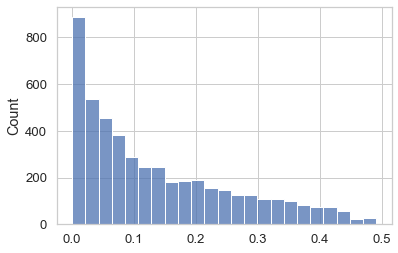

In [295]:
sns.histplot(wt_rep3_naked_plasmid.mean(axis=0))